In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(10,10)})

#### READING ALL DATASETS

In [ ]:
circuits = pd.read_csv('./data/circuits.csv')
constructor_results = pd.read_csv('./data/constructor_results.csv')
constructor_standings = pd.read_csv('./data/constructor_standings.csv')
constructors = pd.read_csv('./data/constructors.csv')
driver_standings = pd.read_csv('./data/driver_standings.csv')
drivers = pd.read_csv('./data/drivers.csv')
lap_times = pd.read_csv('./data/lap_times.csv')
pit_stops = pd.read_csv('./data/pit_stops.csv')
qualifying = pd.read_csv('./data/qualifying.csv')
races = pd.read_csv('./data/races.csv')
results = pd.read_csv('./data/results.csv')
seasons = pd.read_csv('./data/seasons.csv')
sprint_results = pd.read_csv('./data/sprint_results.csv')
status = pd.read_csv('./data/status.csv')
weather = pd.read_csv('./data/weather.csv')

#### DROPPING REDUNDANT COLUMNS

In [ ]:
del circuits["lat"]
del circuits["lng"]
del circuits["country"]
del circuits["alt"]
del circuits["url"]
del circuits["name"]
del constructor_results['status']
del constructor_standings["positionText"]
del constructors["name"]
del constructors["url"]
driver_standings.drop(['positionText'], axis=1, inplace=True)
drivers.drop(['surname', 'url'], axis=1, inplace=True)
lap_times.drop(['time'], axis=1, inplace=True)
pit_stops.drop(['time', 'duration'], axis=1, inplace=True)
races = races.drop(['url','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis = 1)
results.drop(['time', 'milliseconds', 'rank', 'positionText', 'position'], axis = 1, inplace = True)
seasons.drop(['url'], axis = 1, inplace=True)
weather.drop(['weather'], axis = 1, inplace=True)



#### RENAMING

In [ ]:
weather.rename(columns={'season': 'year'}, inplace = True)

In [ ]:
results.rename(columns={'number': 'car_number', 'points': 'results_points', 'positionOrder': 'results_positionOrder'}, inplace = True)

In [ ]:
qualifying.rename(columns={'q1': 'q1_time', 'q2':'q2_time', 'q3': 'q3_time', 'position': 'qualifying_position'}, inplace=True)

In [ ]:
circuits.rename(columns={'location': 'circuit_location'}, inplace = True)

In [ ]:
constructor_standings.rename(columns = {'position': 'constructor_position', 'points': 'constructor_points', 'wins': 'constructor_wins'}, inplace = True)

In [ ]:
constructors.rename(columns={'nationality': 'constructor_nationality'}, inplace = True)

In [ ]:
drivers.rename(columns={'number': 'driver_number', 'nationality': 'driver_nationality', 'code': 'driver_code'}, inplace = True)

In [ ]:
driver_standings.rename(columns={'position': 'driver_position', 'points': 'driver_points', 'wins': 'driver_wins'}, inplace = True)

In [ ]:
lap_times.rename(columns = {'position': 'lap_position'}, inplace=True)

#### MERGING DATA

##### df1: races + weather

In [ ]:
races.info()

In [ ]:
weather.info()

In [ ]:
df_1 = pd.merge(races, weather, on = ['year', 'round'], how = 'outer')
df_1.head()

In [ ]:
df_1.shape

In [ ]:
results.head()

##### df2: df1 + results

In [ ]:
df_1.info()

In [ ]:
results.info()

In [ ]:
df_2 = pd.merge(df_1, results, on = 'raceId')
df_2.head()

In [ ]:
df_2.shape

##### df3: df2 + status

In [ ]:
status.info()

In [ ]:
df_3 = pd.merge(df_2, status, on = 'statusId')
df_3.loc[df_3['circuitId'] == 2]

In [ ]:
df_3.head()

In [ ]:
df_3.shape

#####

##### df4: df3 + circuits

In [ ]:
circuits.info()

In [ ]:
df_3.info()

In [ ]:
df_4 = pd.merge(df_3, circuits, on = 'circuitId')
df_4.drop(['circuitRef'], axis = 1, inplace=True)

df_4.shape

In [ ]:
df_4.head()

##### df5: df4 + constructor_standings

In [ ]:
df_4.info()

In [ ]:
constructor_standings.info()

In [ ]:
df_5=pd.merge(df_4,constructor_standings, on = ['raceId', 'constructorId'],how='left')
df_5 .head()                                                                                   

In [ ]:
df_5.shape

##### df6: df5 + constructors

In [ ]:
constructors.info()

In [ ]:
constructors.head()

In [ ]:
df_6=pd.merge(df_5,constructors,on=['constructorId'],how='left')
df_6.head()

In [ ]:
df_6.shape

##### df7: df6 + drivers

In [ ]:
drivers.info()

In [ ]:
df_6.info()

In [ ]:
df_7=pd.merge(df_6,drivers,on=['driverId'])
df_7.head()

In [ ]:
df_7.shape

##### df8: df7 + driver_standings

In [ ]:
df_7.info()

In [ ]:
driver_standings.info()

In [ ]:
df_8 = pd.merge(df_7, driver_standings, on = ['raceId', 'driverId'], how = 'left')
df_8.head()

In [ ]:
df_8.shape

In [ ]:
df_8.columns

##### df9: df8 + qualifying

In [ ]:
df_8.info()

In [ ]:
qualifying.info()

In [ ]:
df_9 = pd.merge(df_8, qualifying, on = ['raceId', 'driverId', 'constructorId'], how = 'left')
df_9.head()

In [ ]:
df_9.shape

##### df10: df9 + pit_stops 

In [ ]:
df_9.info()

In [ ]:
pit_stops.info()

In [ ]:
uniqueRaceIds = pit_stops['raceId'].unique()

In [ ]:
df_list = []
for i in uniqueRaceIds:
    x = pit_stops.loc[pit_stops['raceId'] == i]
    uniqueDriverIds = x['driverId'].unique()    
    for j in uniqueDriverIds:
        row = []
        y = x.loc[x['driverId'] == j]
        # print(y)
        no_of_pit_stops = len(y)
        avg_pit_stop_time = y['milliseconds'].mean()
        row.append(i)
        row.append(j)
        row.append(no_of_pit_stops)
        row.append(avg_pit_stop_time)        
        df_list.append(row)
temp_pit_stops = pd.DataFrame(df_list, columns=['raceId', 'driverId', 'no_of_stops', 'ms_avg'])
temp_pit_stops
        

In [ ]:
temp_pit_stops.info()

In [ ]:
df_10 = pd.merge(df_9, temp_pit_stops, on = ['raceId', 'driverId'], how = 'left')
df_10.info()

##### df11: df10 + lap_times

In [ ]:
df_10.info()

In [ ]:
lap_times.info()

In [ ]:
uniqueRaceIds = lap_times['raceId'].unique()

In [ ]:
df_list = []
for i in uniqueRaceIds:
    x = lap_times.loc[lap_times['raceId'] == i]
    uniqueDriverIds = x['driverId'].unique()    
    max_laps = 0
    for j in uniqueDriverIds:
        row = []
        y = x.loc[x['driverId'] == j]
        max_laps = max(max_laps, len(y))            
    for j in uniqueDriverIds:
        row = []
        y = x.loc[x['driverId'] == j]
        first_5_laps_avg_time = y[0:5]['milliseconds'].mean()
        last_10_laps_avg_time = y[max_laps-10:max_laps]['milliseconds'].mean()
        lap_position_after_first_5_laps = y.loc[y['lap'] == 5]
        lap_position_after_first_5_laps = lap_position_after_first_5_laps['lap_position']      
        lap_position_before_last_10_laps  = y.loc[y['lap'] == max_laps - 10]
        lap_position_before_last_10_laps = lap_position_before_last_10_laps['lap_position']
        row.append(i)
        row.append(j)
        row.append(first_5_laps_avg_time)
        row.append(last_10_laps_avg_time)
        row.append(str(lap_position_after_first_5_laps).split('\n')[0].split(' ')[4])
        row.append(str(lap_position_before_last_10_laps).split('\n')[0].split(' ')[4])
        df_list.append(row)
        
temp_lap_times = pd.DataFrame(df_list, columns=['raceId', 'driverId', 'first_5_avg_time', 'last_10_avg_time', 'lap_position_after_5', 'lap_position_before_last_10'])
temp_lap_times
        

In [ ]:
temp_lap_times.info()

In [ ]:
df_11 = pd.merge(df_10, temp_lap_times, on = ['raceId', 'driverId'], how = 'left')
df_11.shape

In [ ]:
df_11.head()

## EDA

#### Info of all columns

In [ ]:
df_11.info()

#### Value counts for each columns

In [ ]:
for i in df_11.columns:
    print('----' + str(i) + '----')
    print(df_11[i].value_counts())

#### Checking Null Values 

###### According to us, the columns [raceId, circuitId, DriverId, ConstructorId, Car_number, statusId] should not contain any null values

In [ ]:
for i in df_11.columns:
    print(str(i) + ' : ' + str(df_11[i].isna().any()))

###### The above specified columns DO NOT have any null values

#### HISTPLOTS

In [ ]:
for i in df_11.columns: 
    sns.histplot(df_11[i])
    plt.show()

#### BOXPLOTS

In [ ]:
df_num = df_11.select_dtypes(include=[np.number])
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.title(i)
    plt.show()

#### SCATTER PLOTS

In [ ]:
# CONFUSED 
# df_11.plot.scatter(x = 'raceId')

#### KDE PLOTS

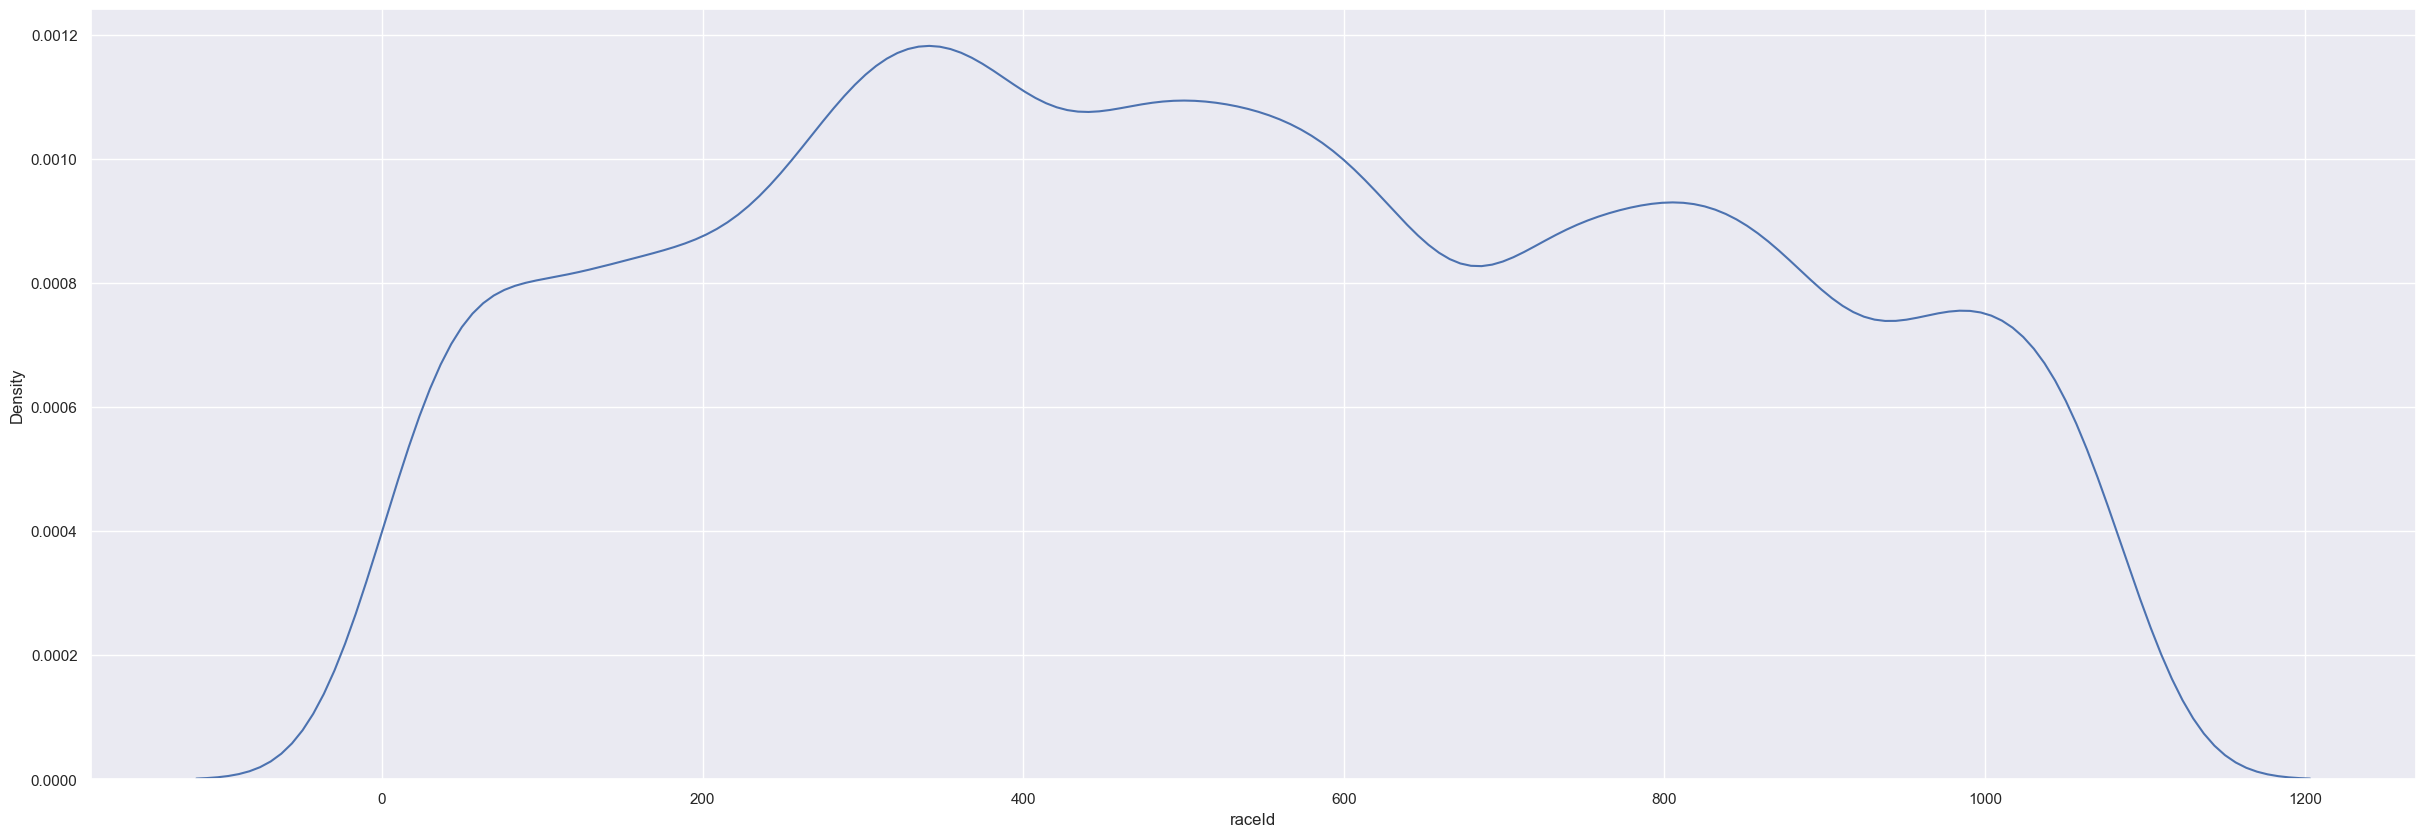

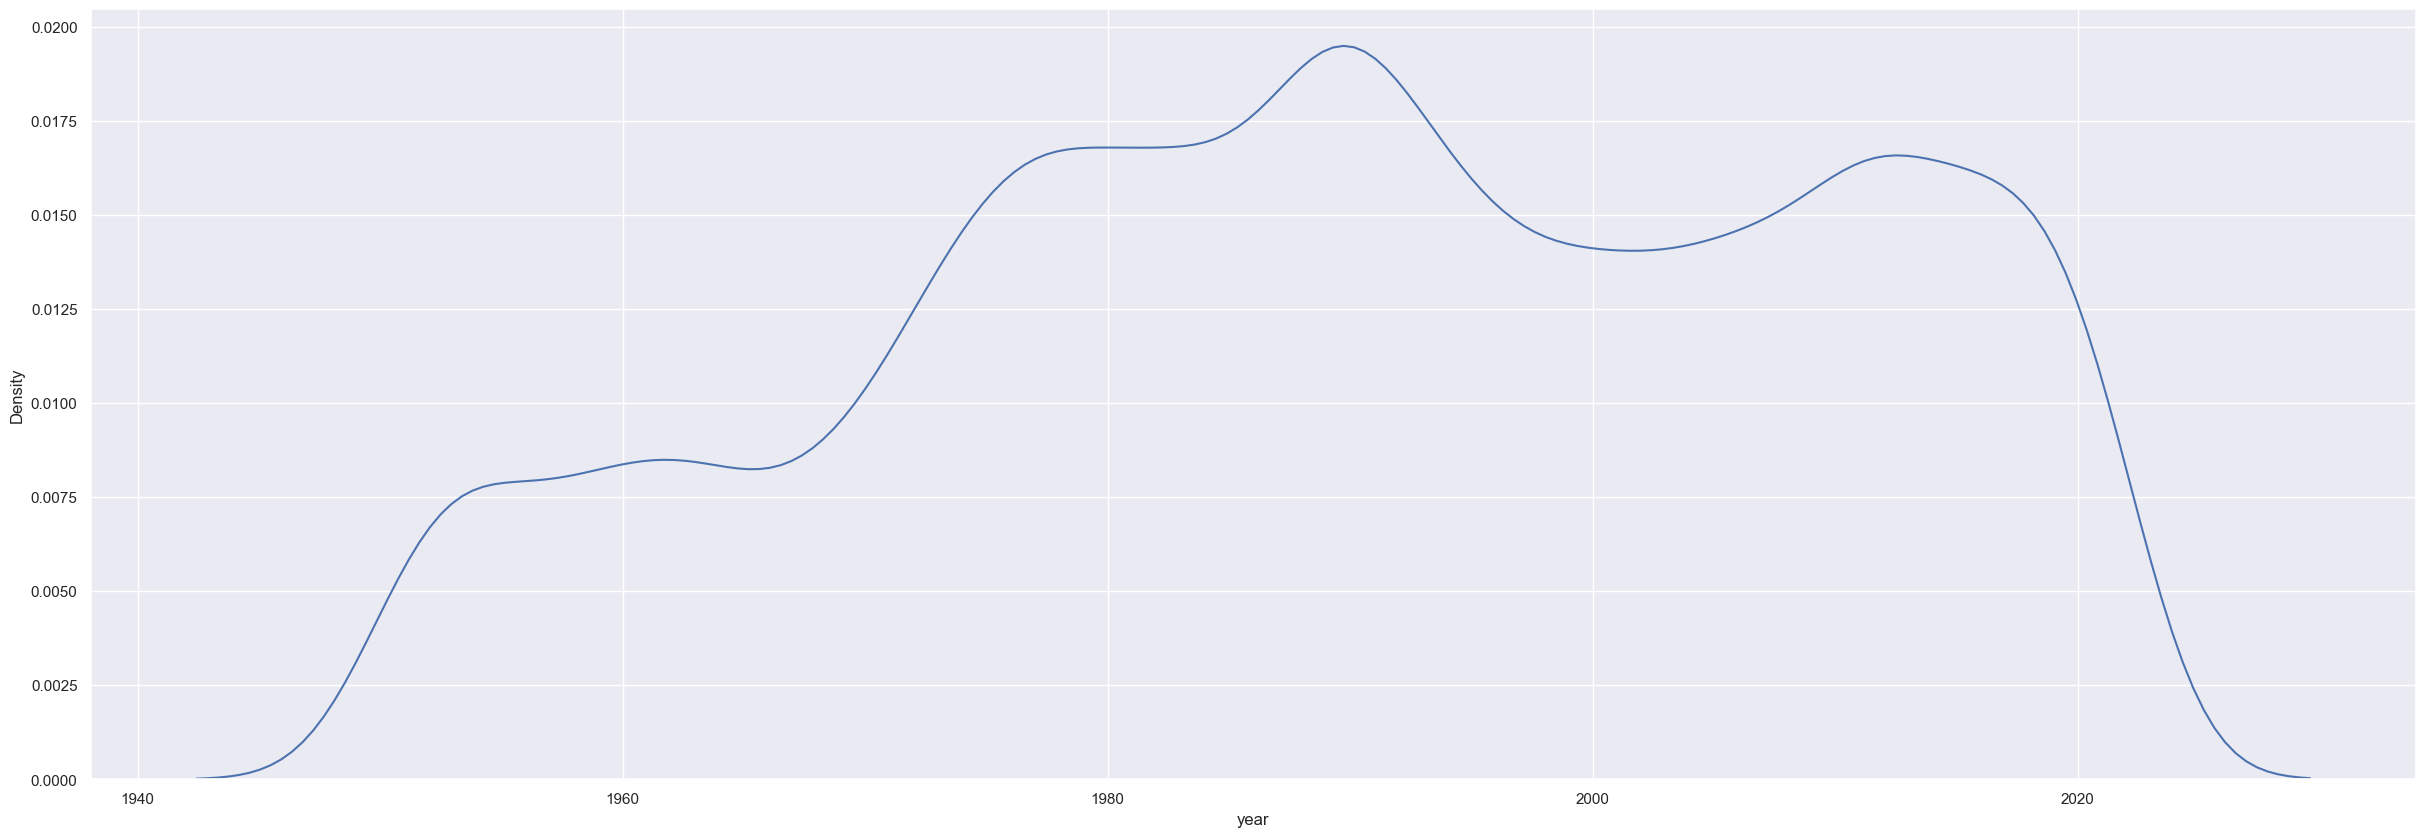

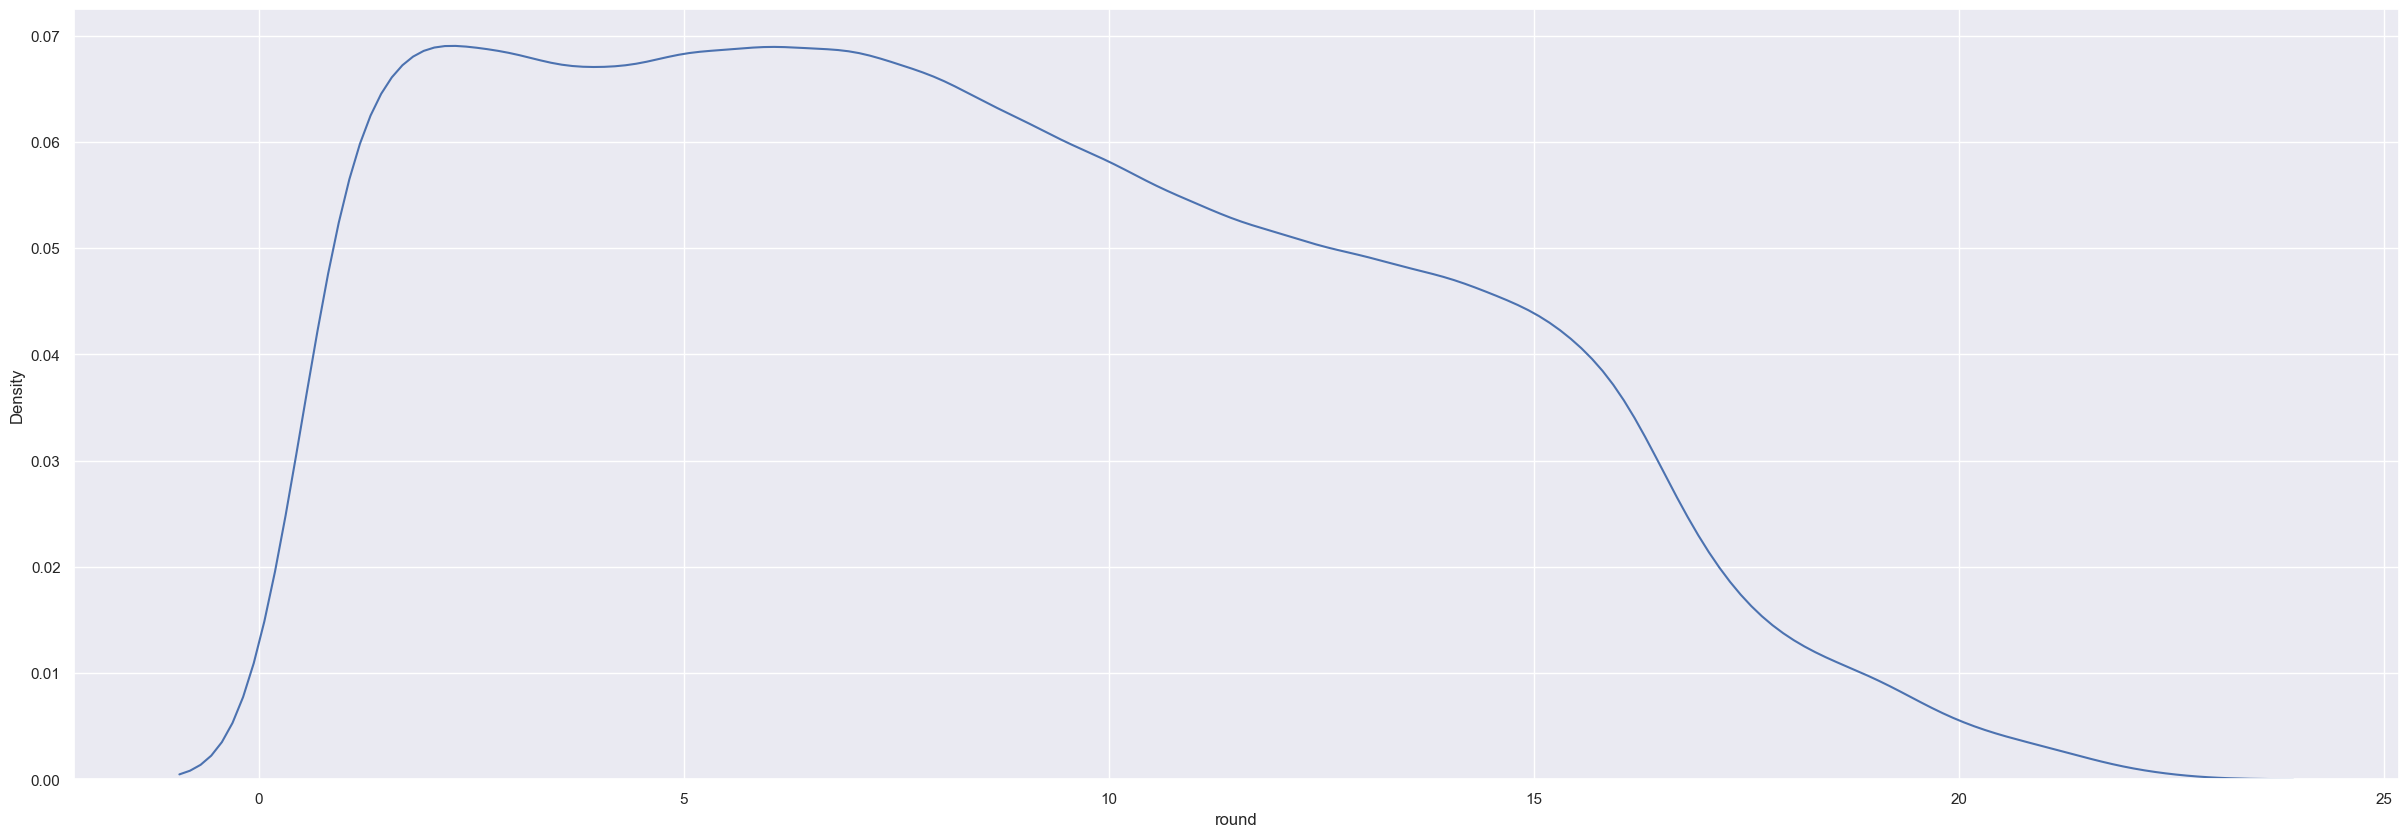

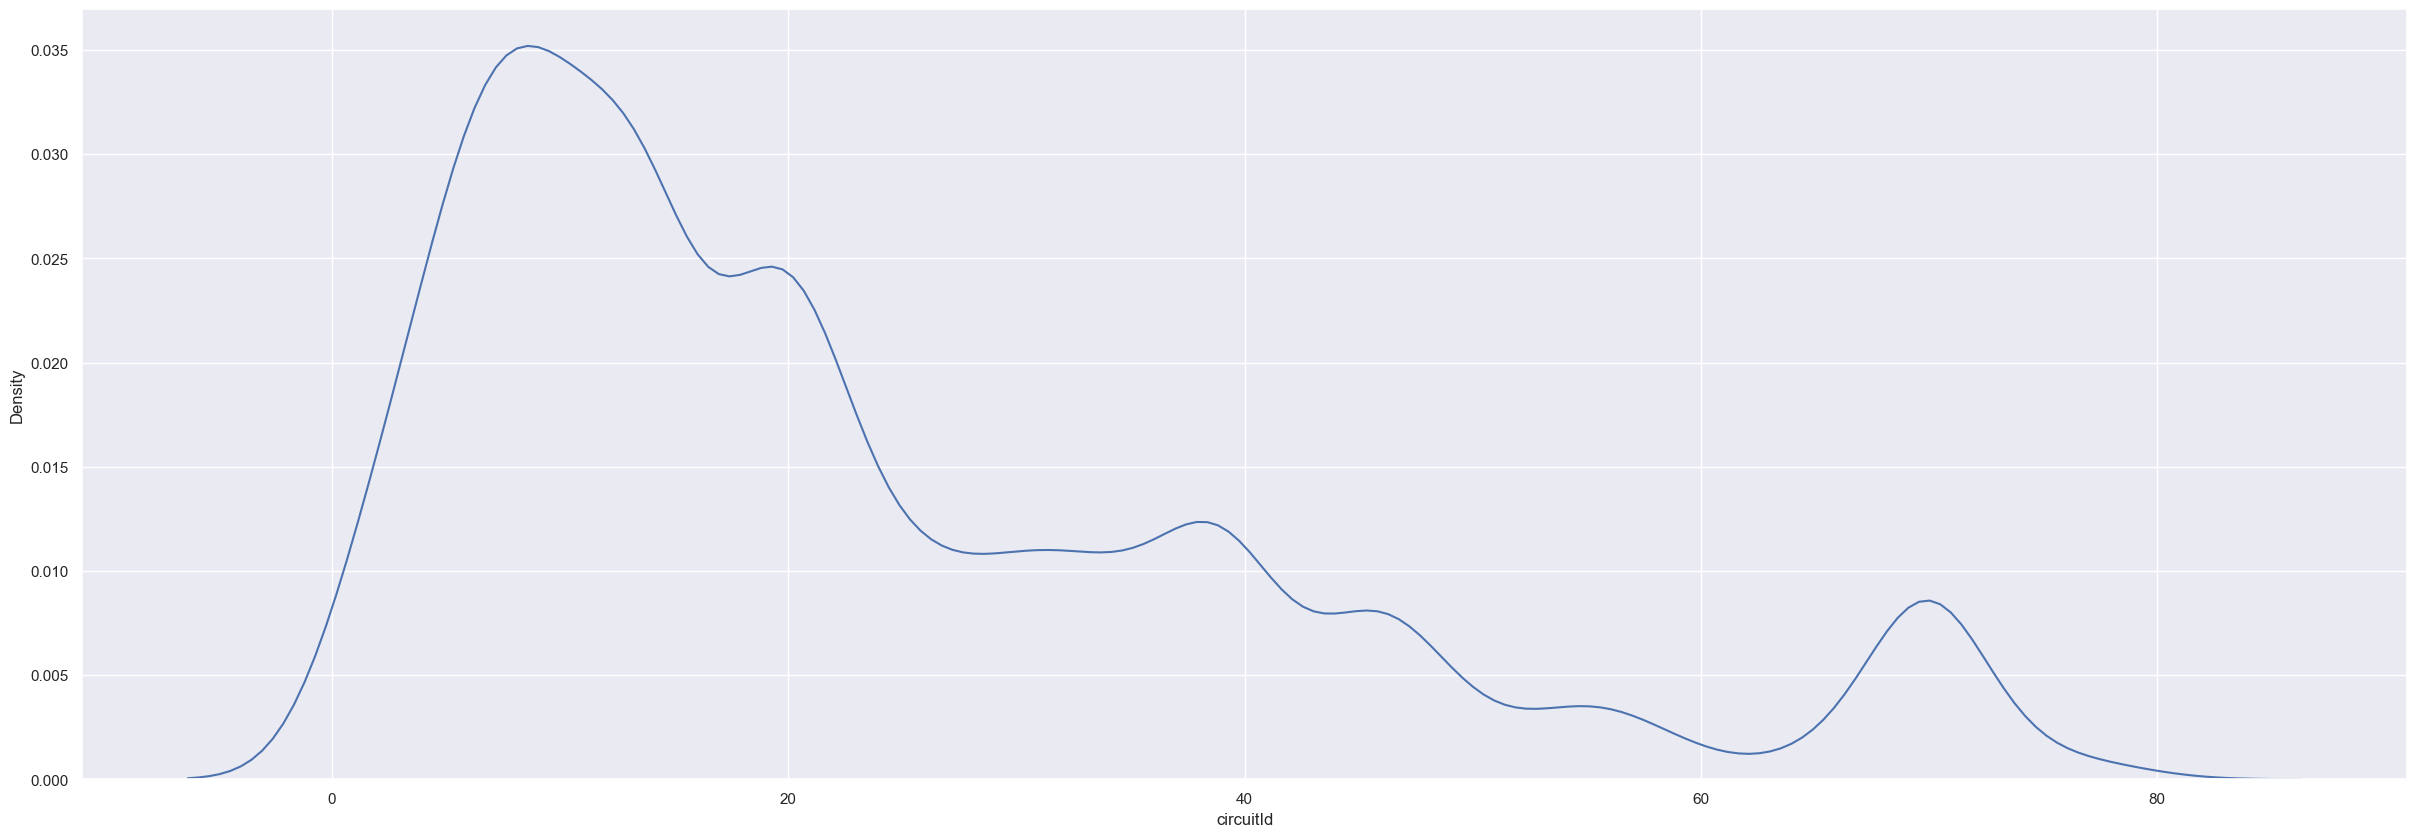

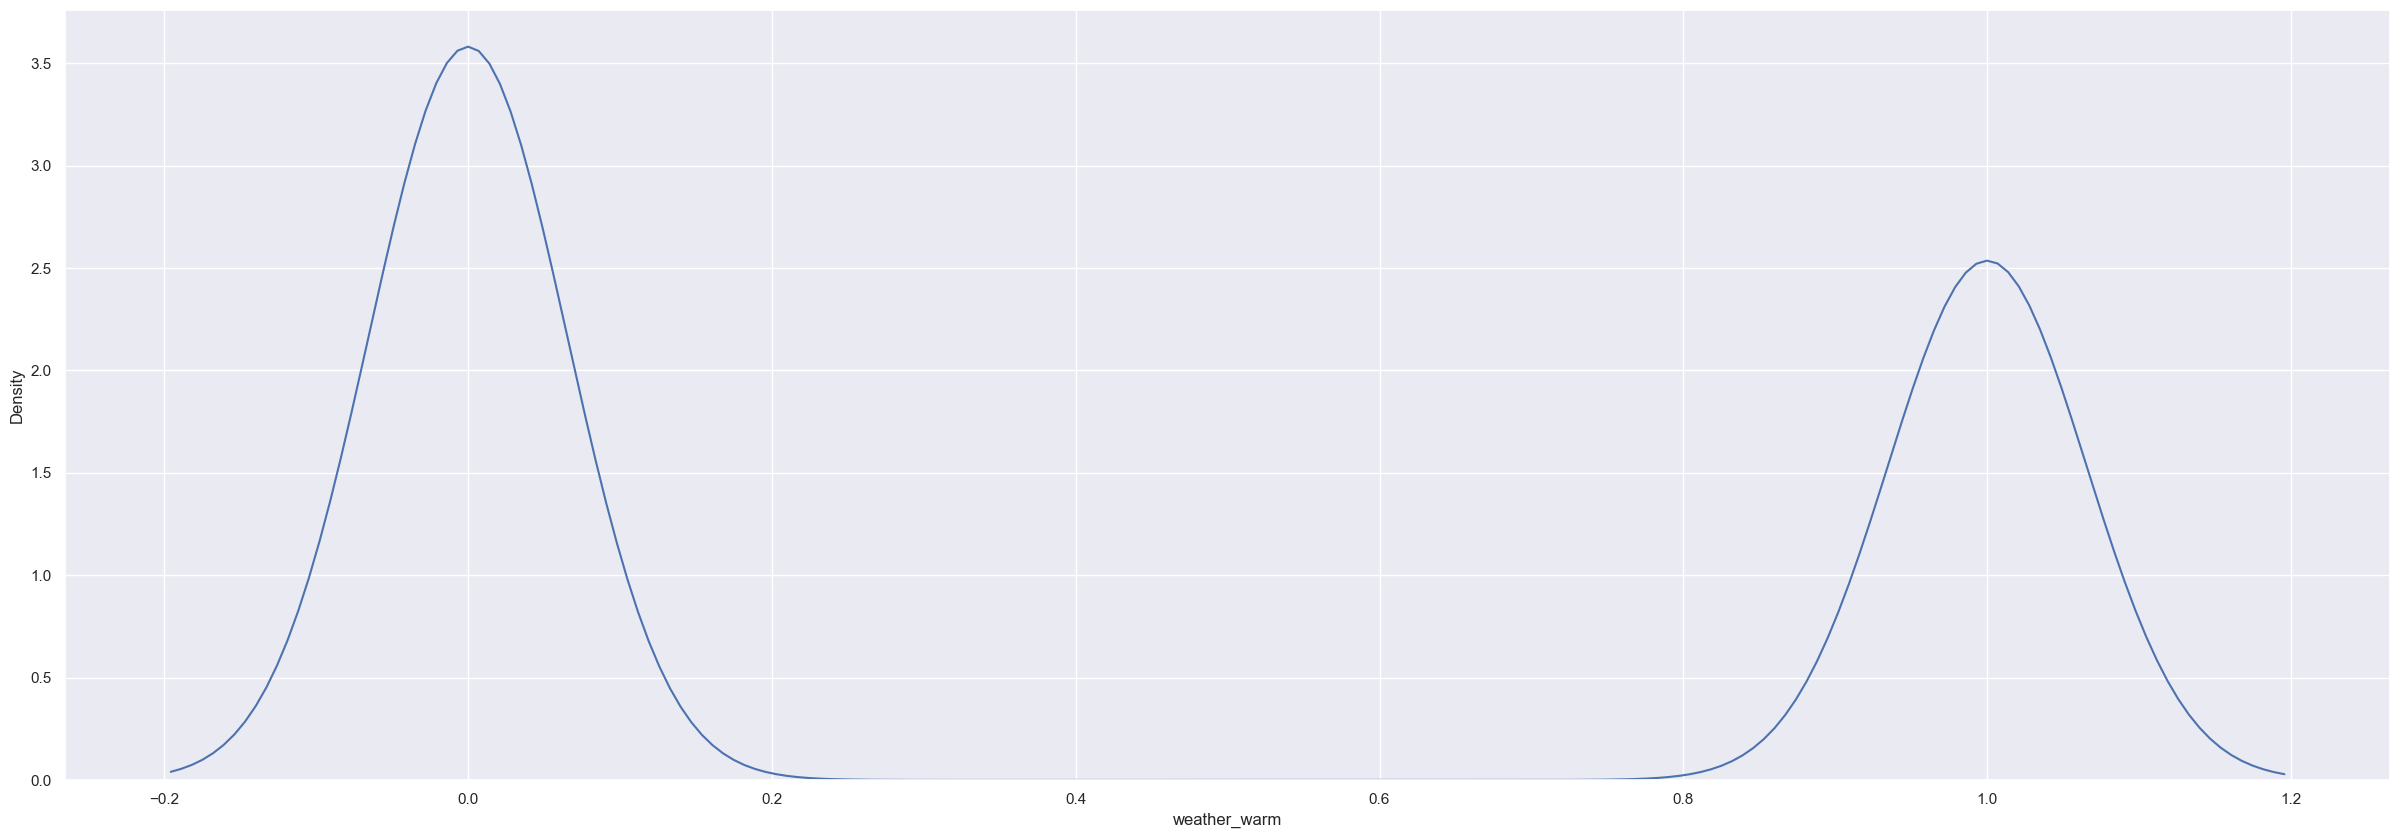

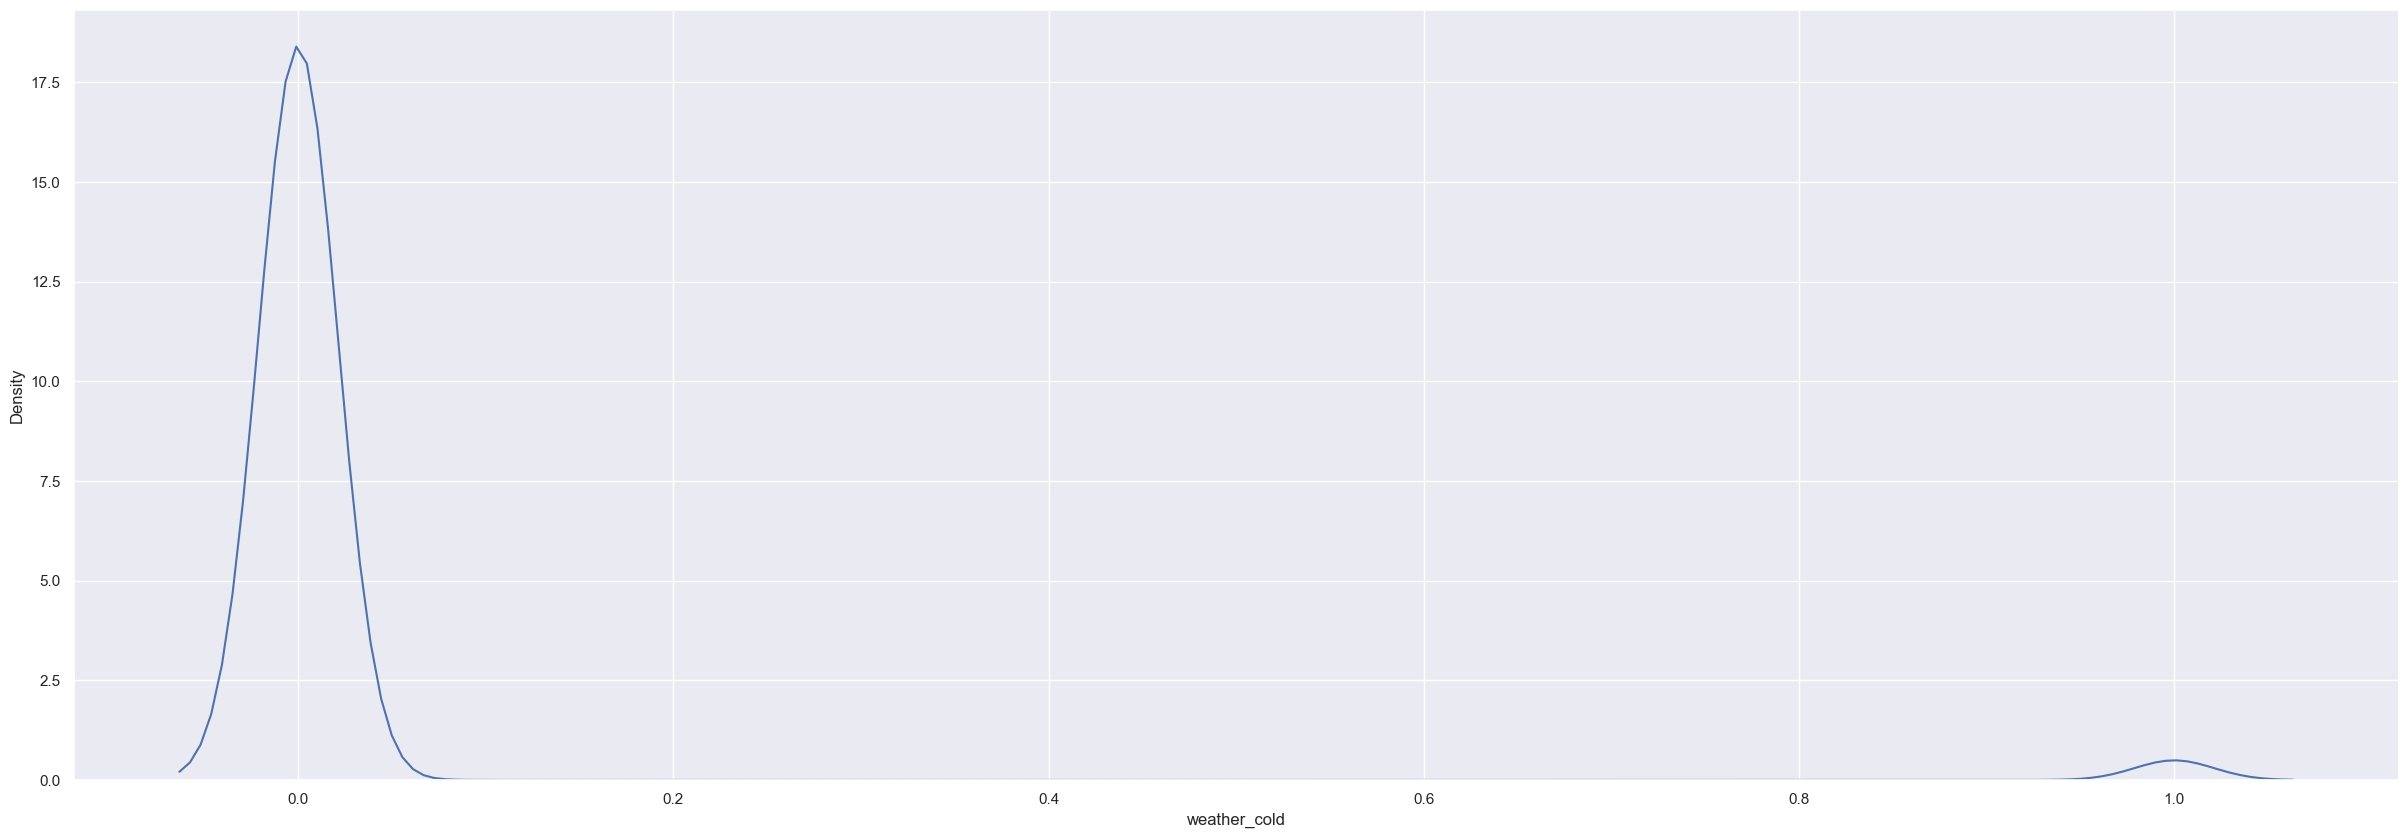

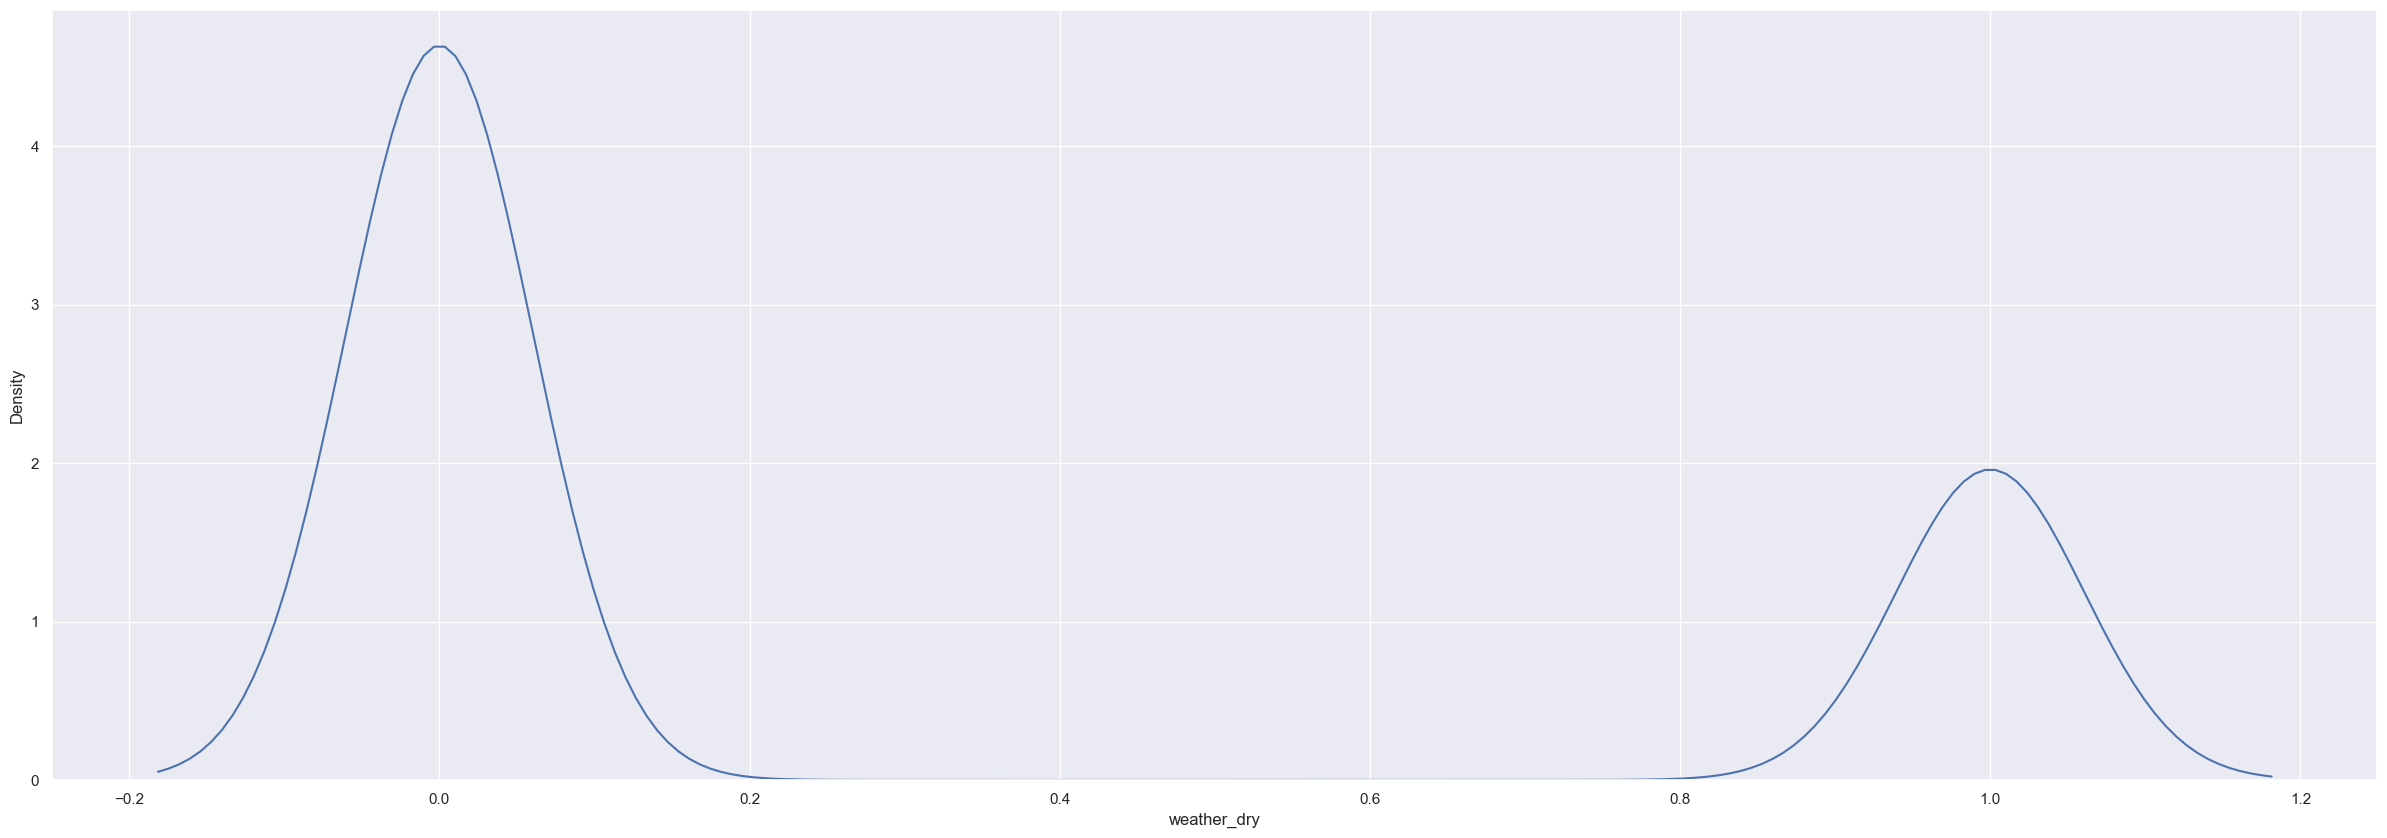

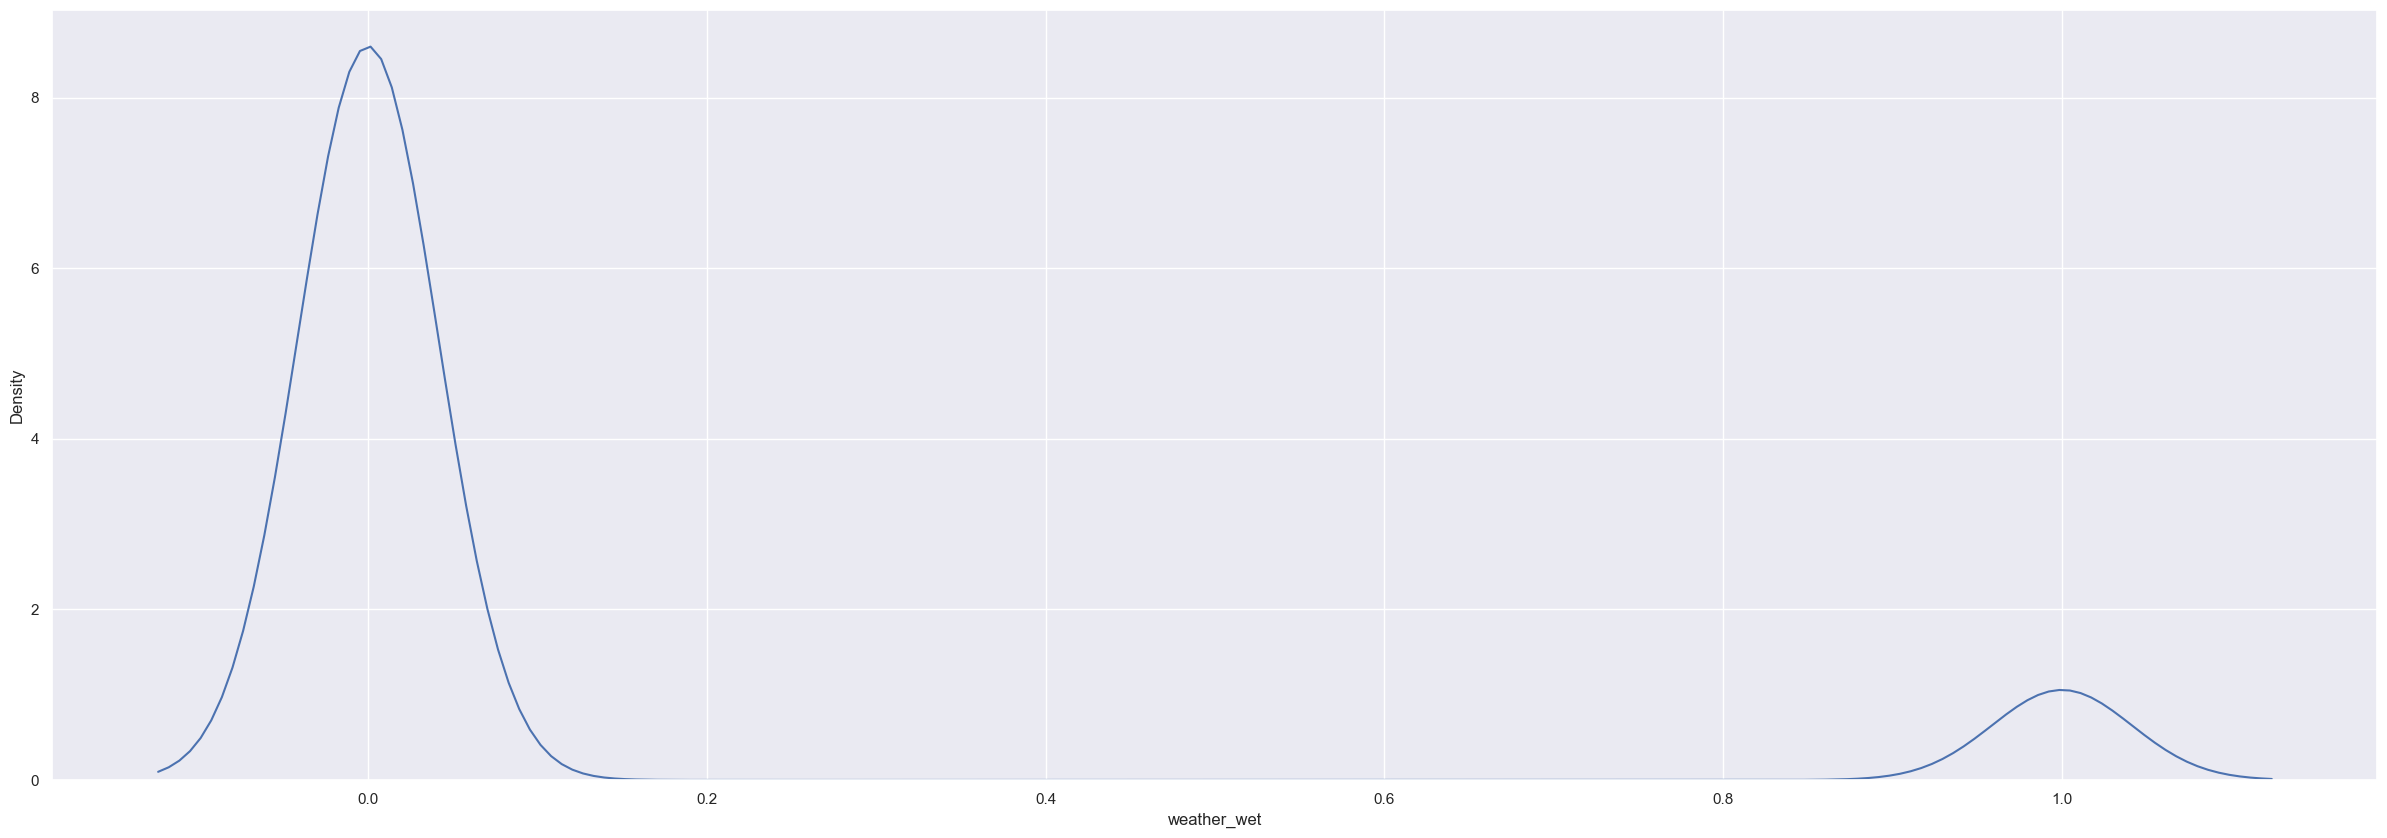

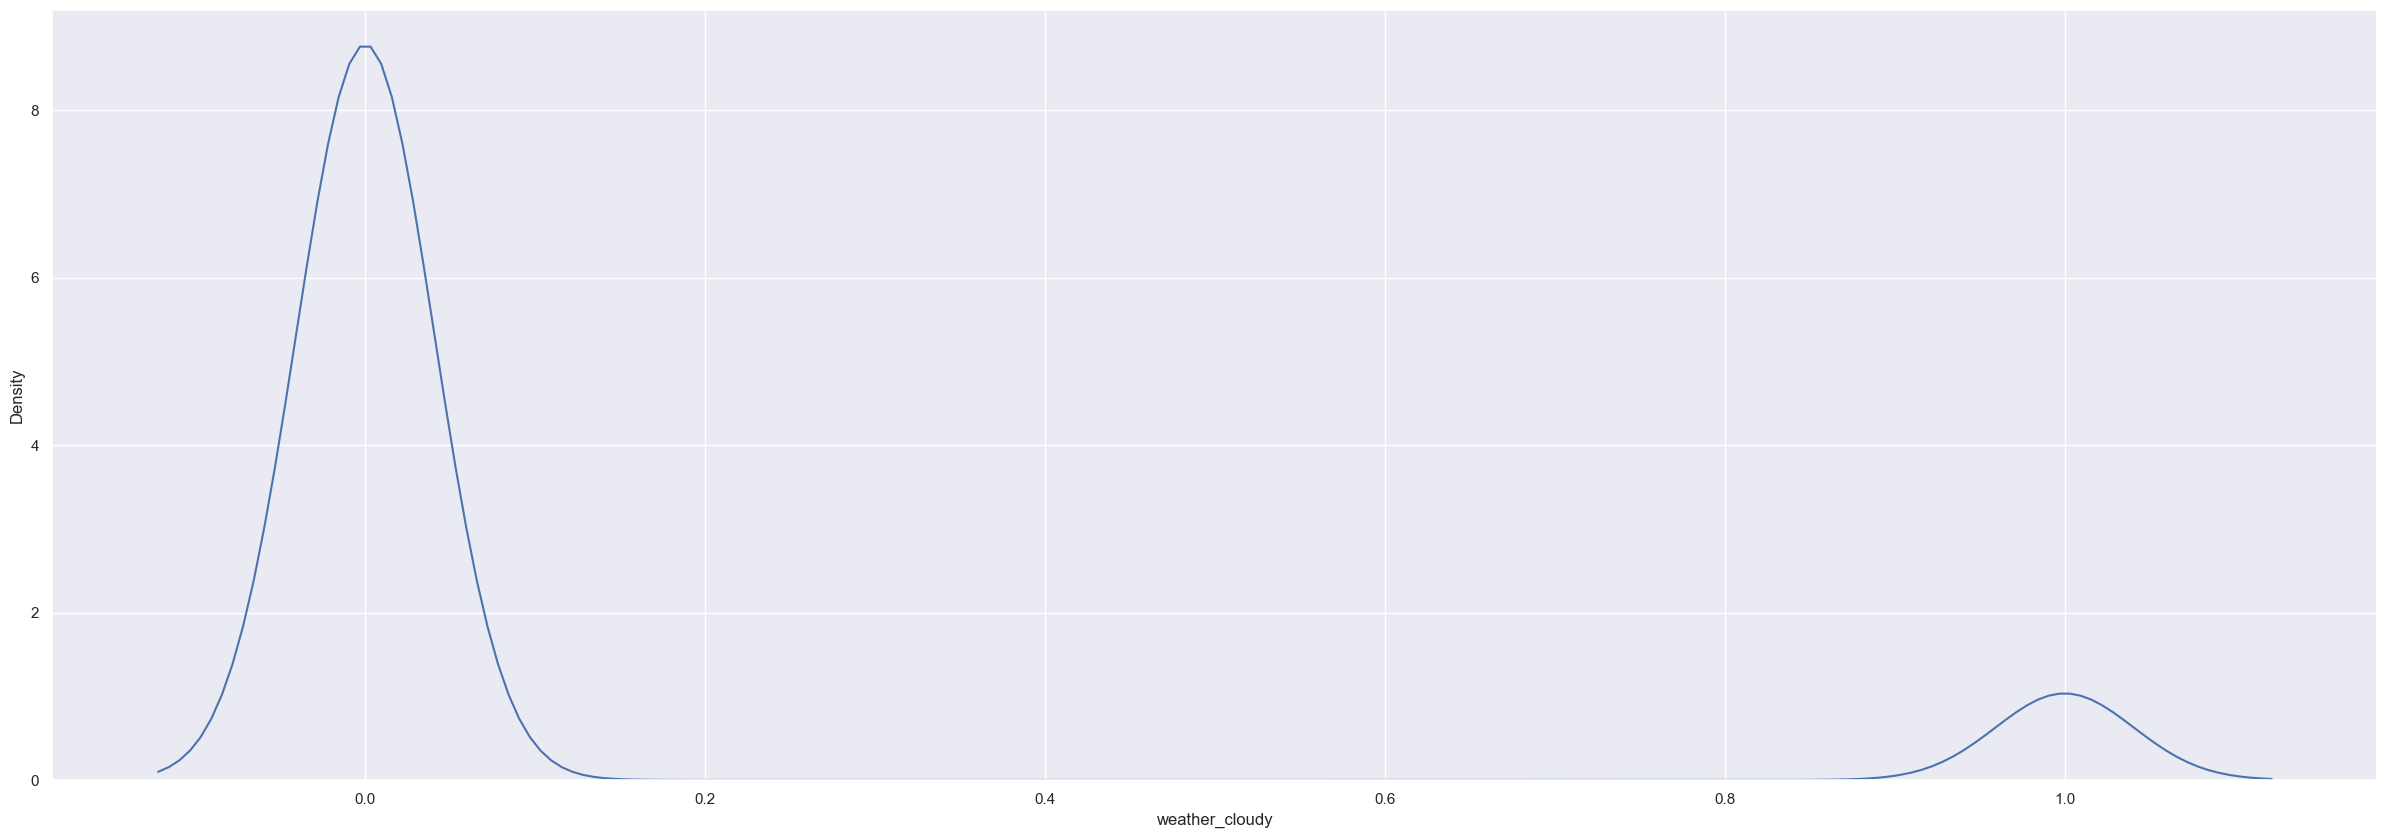

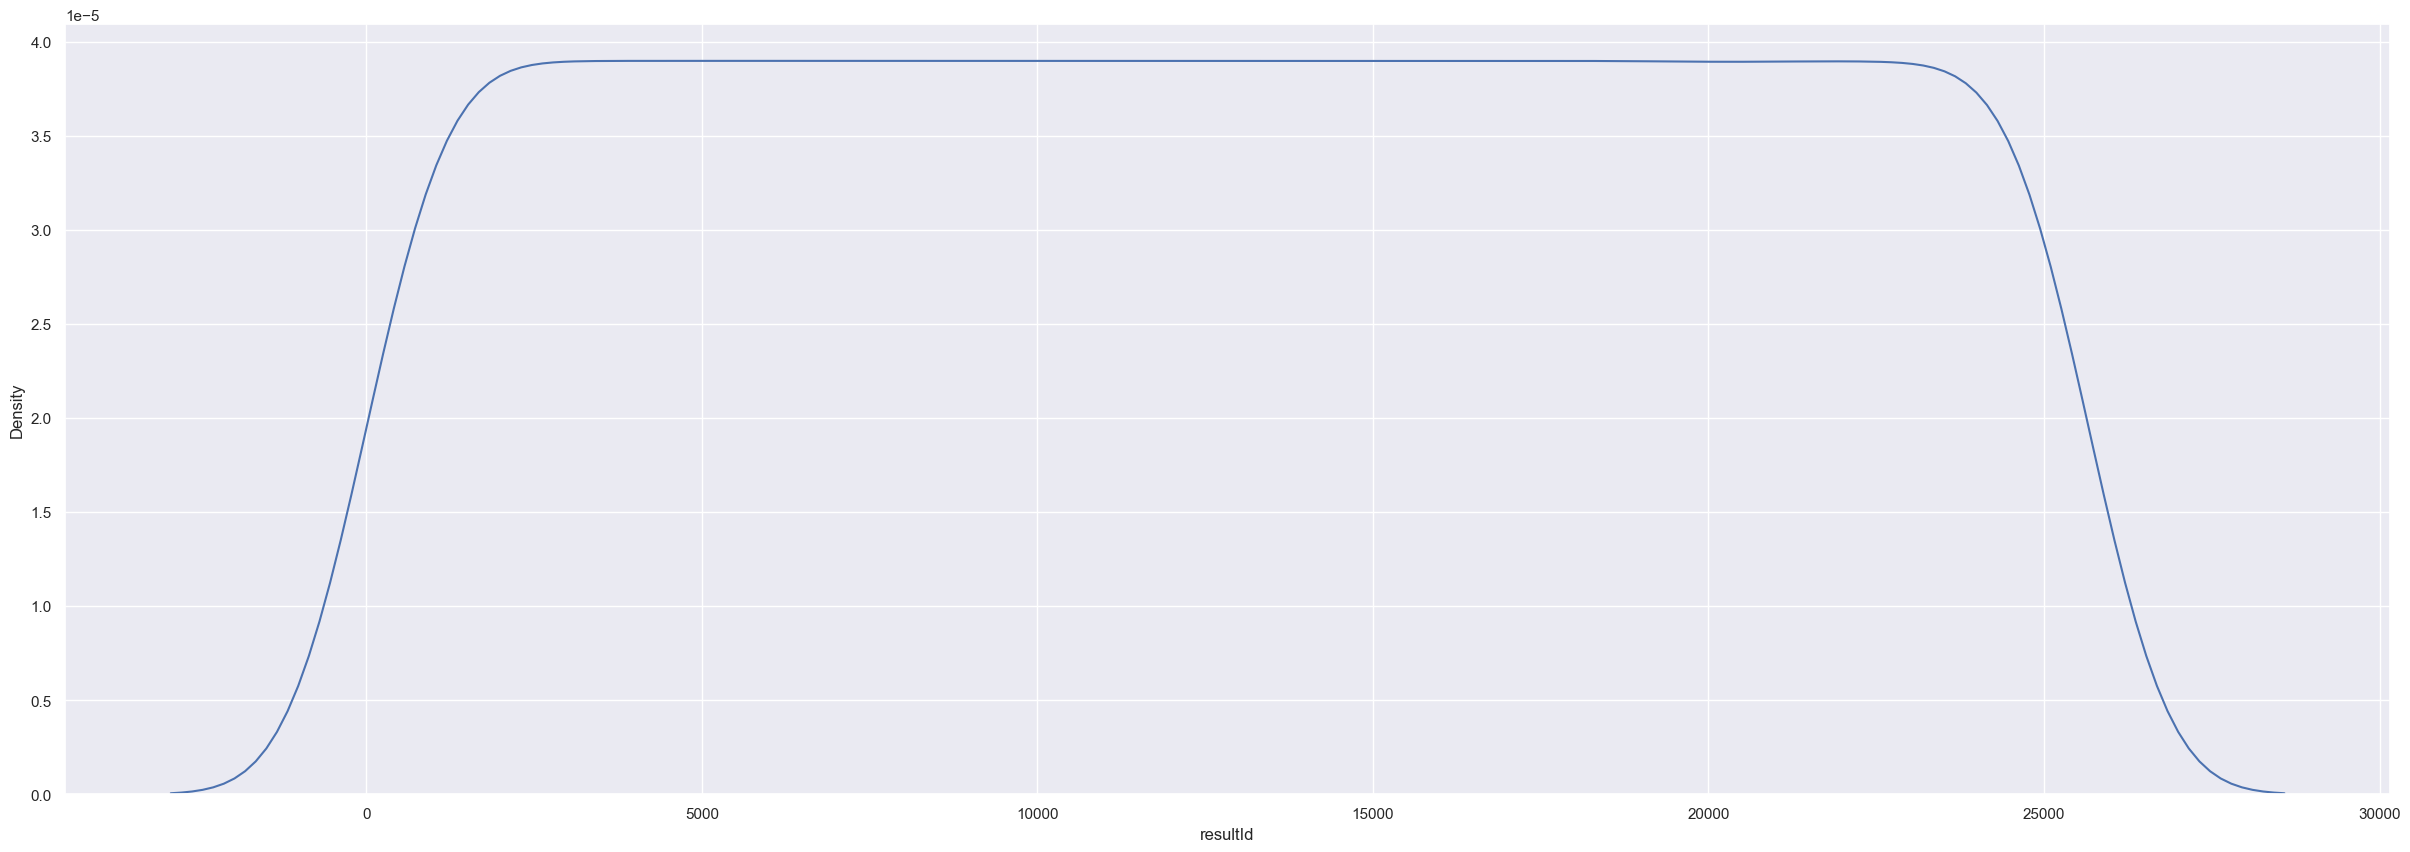

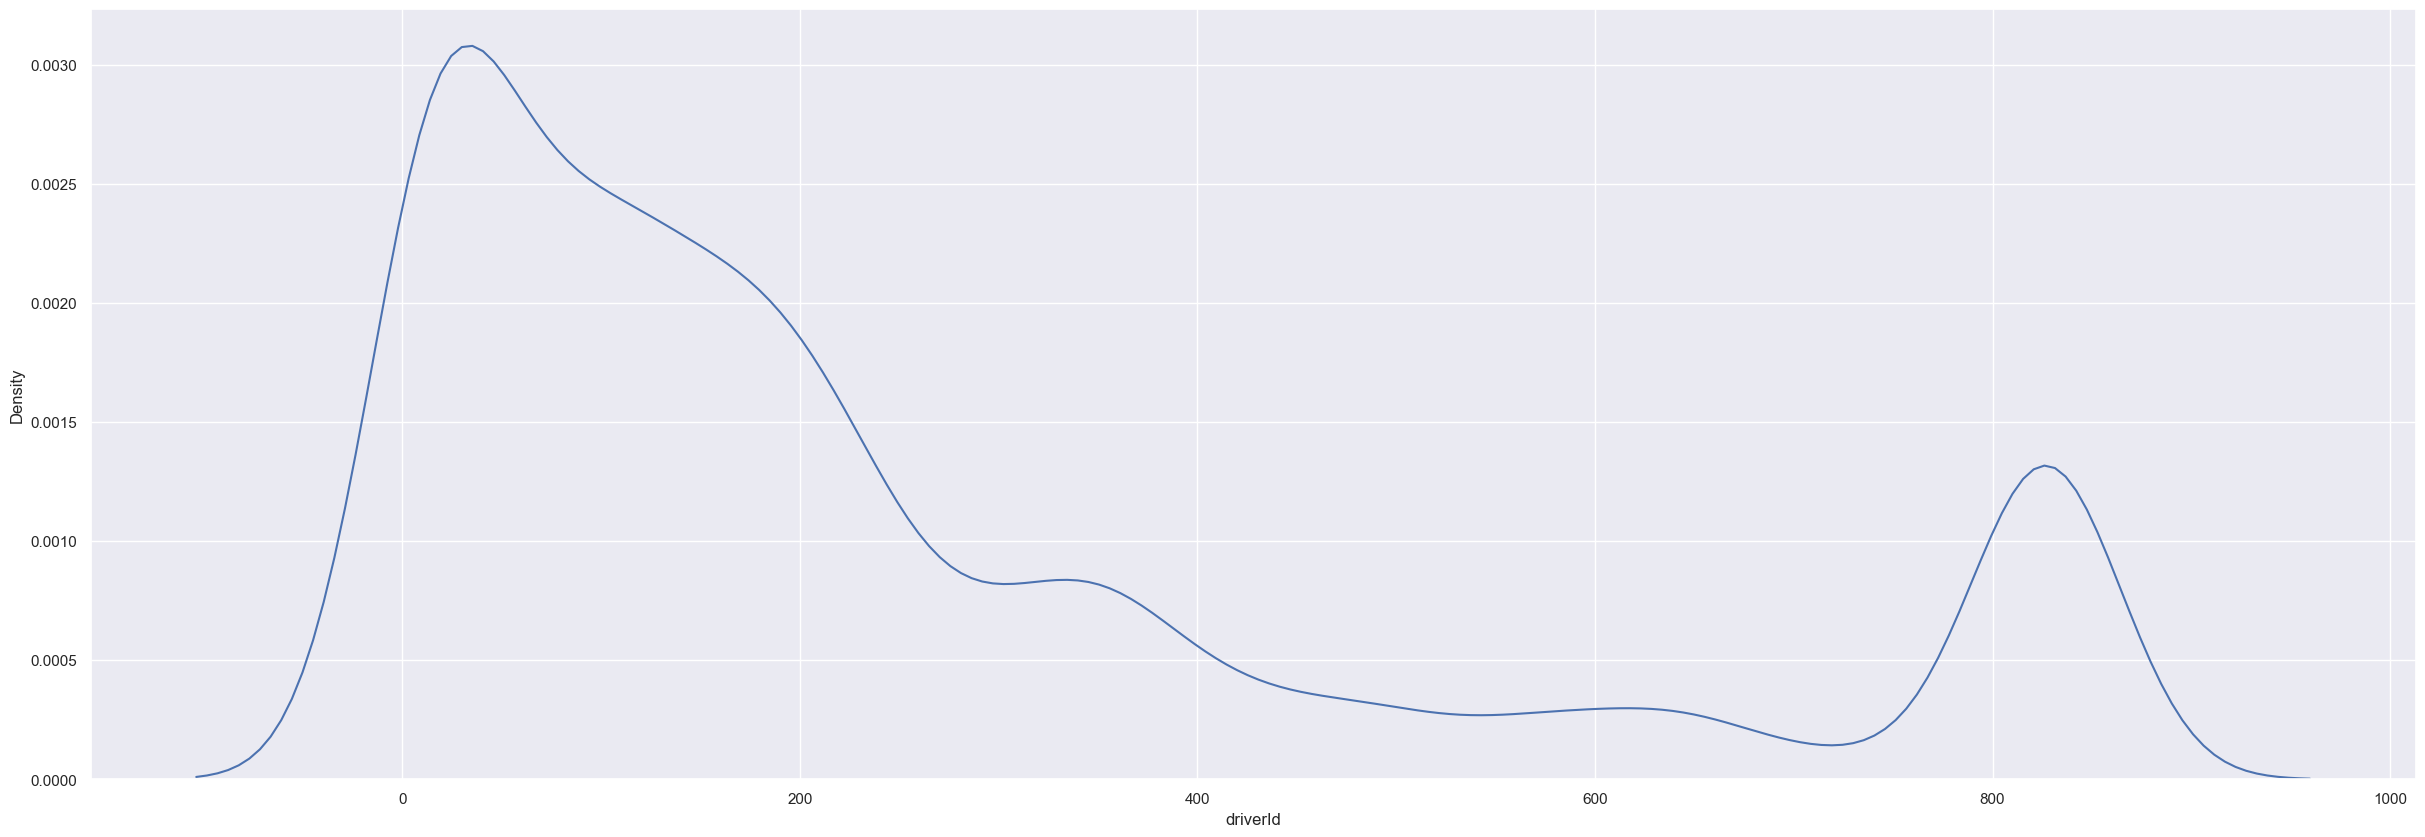

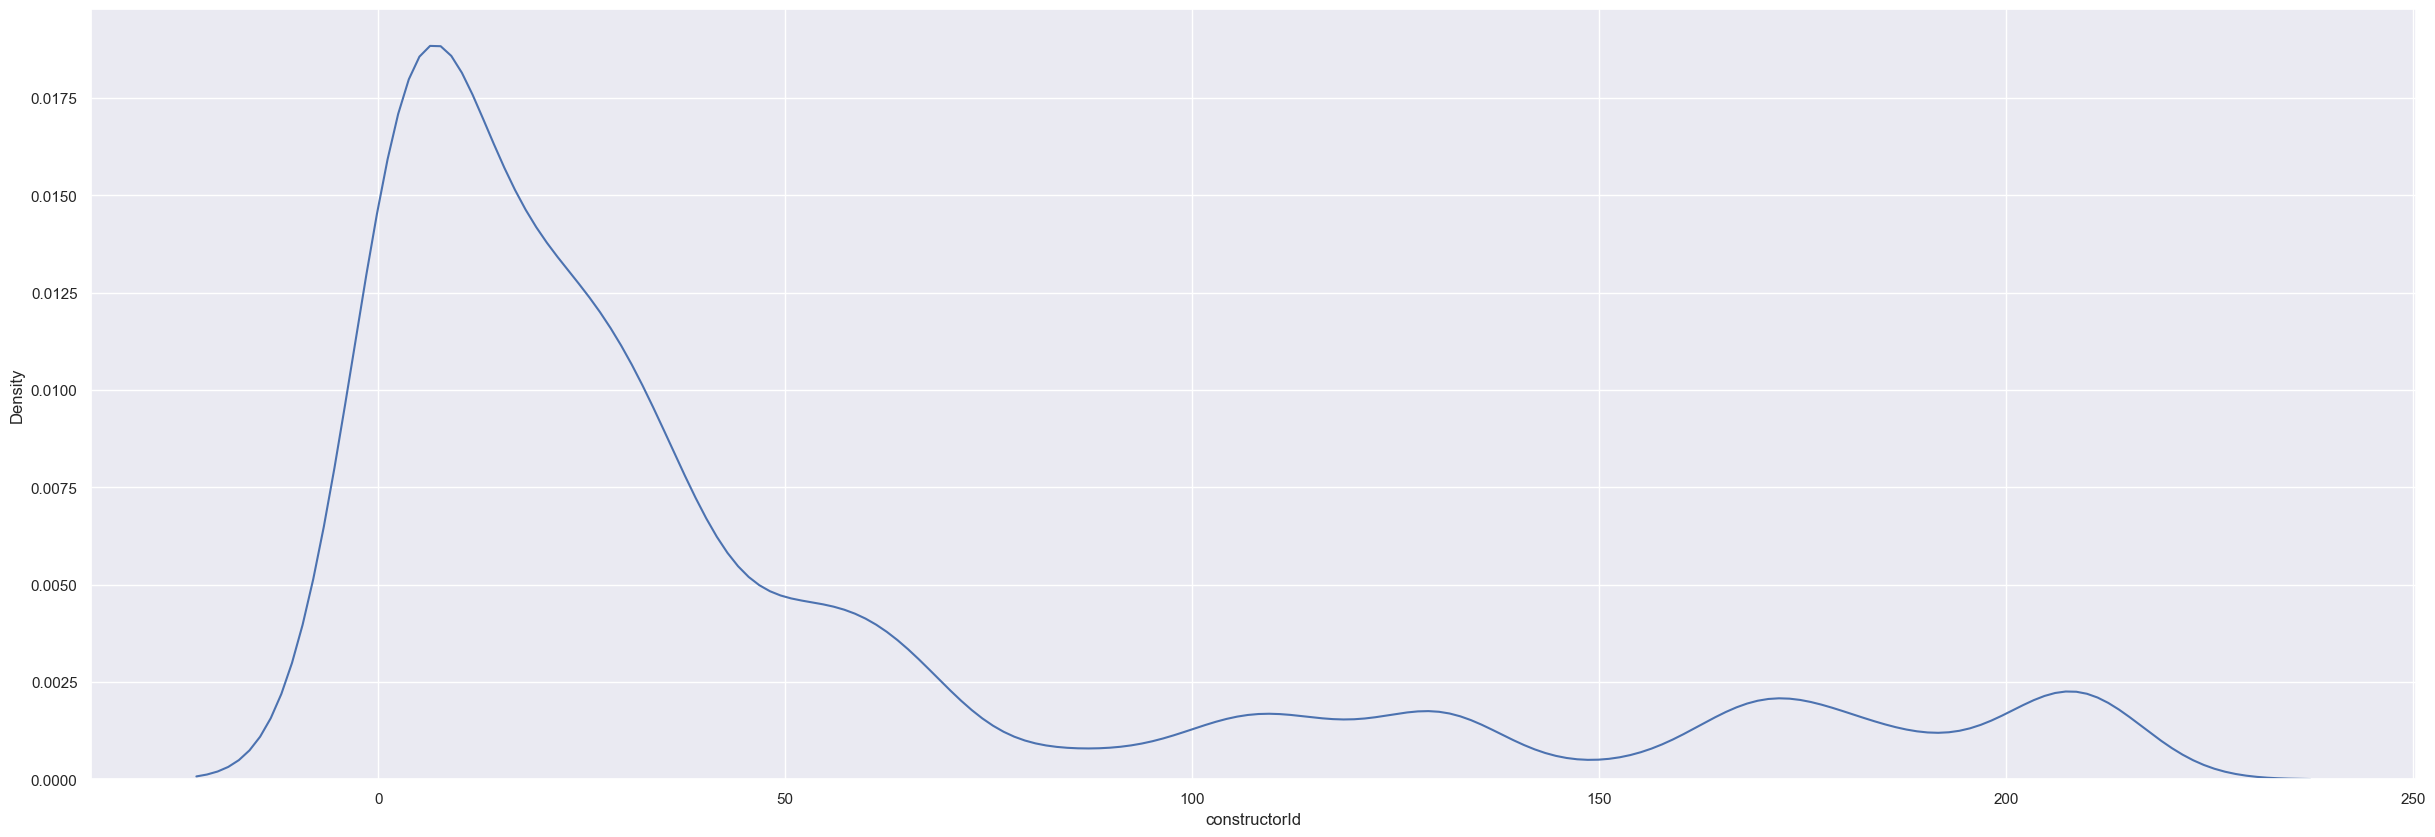

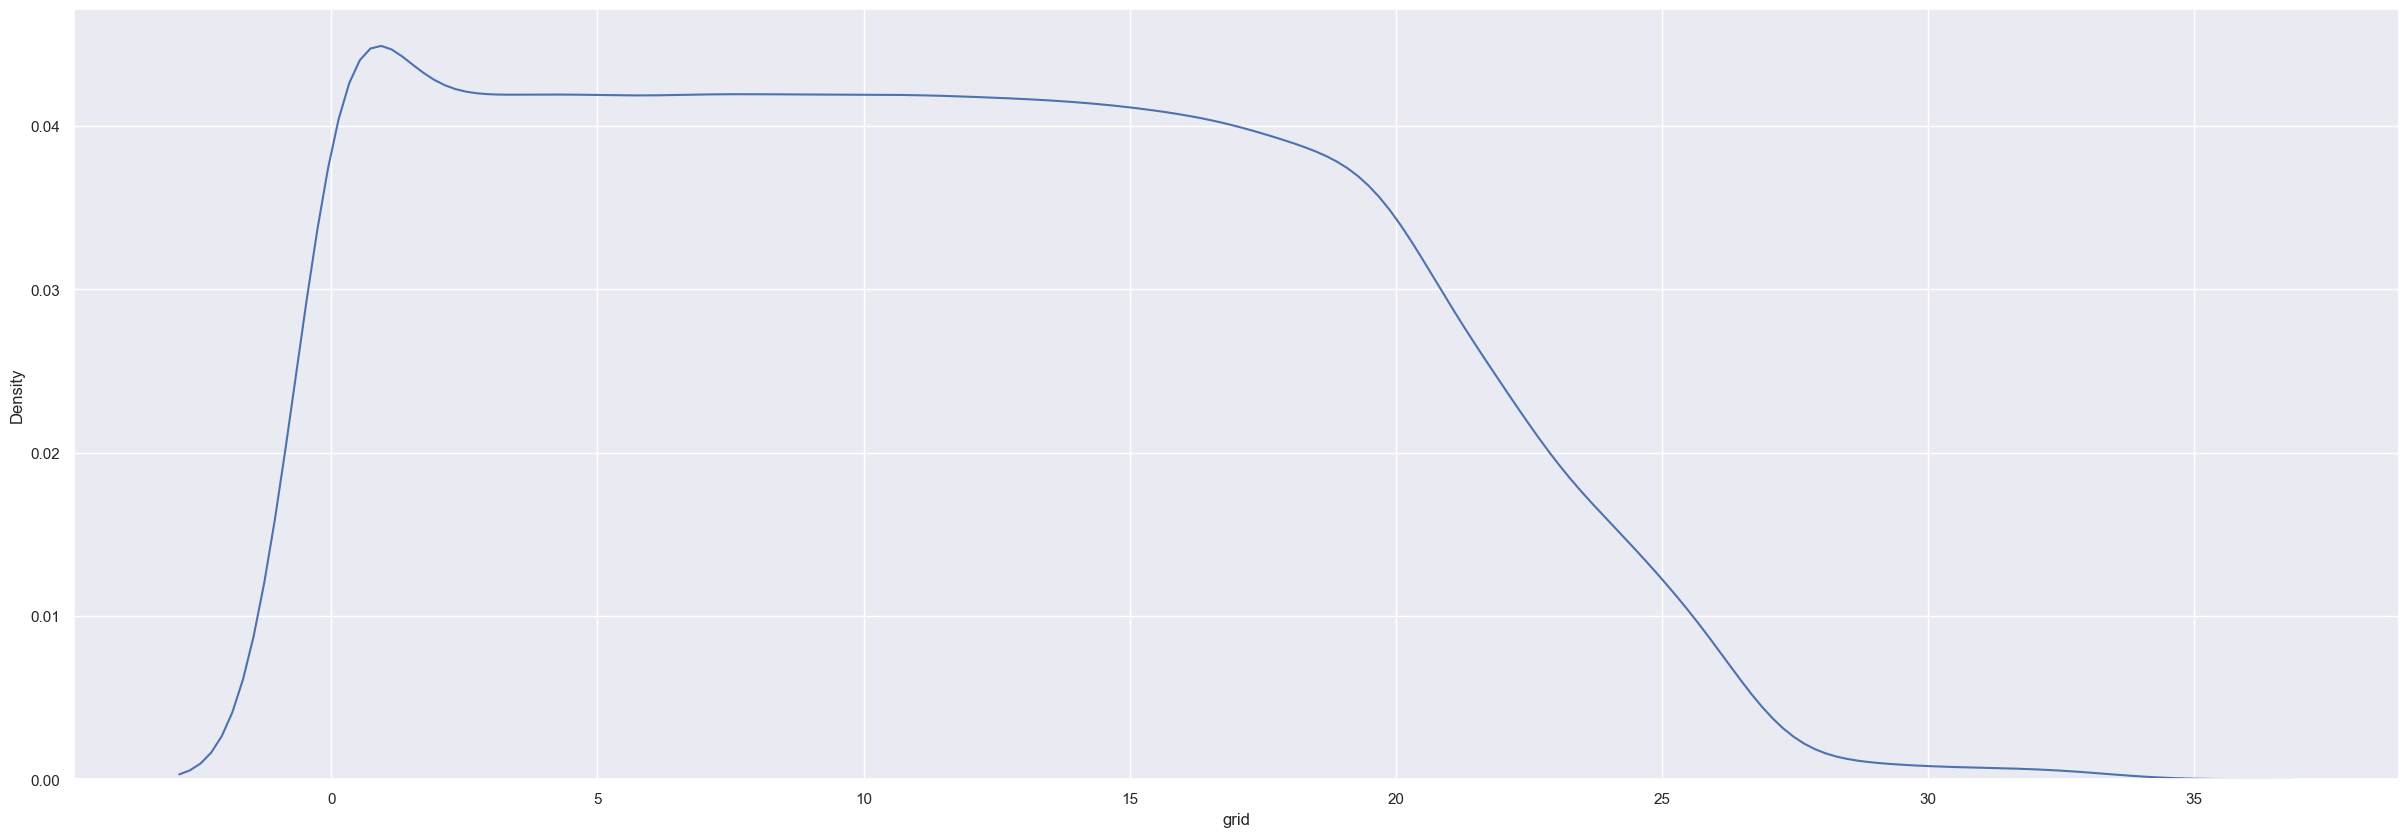

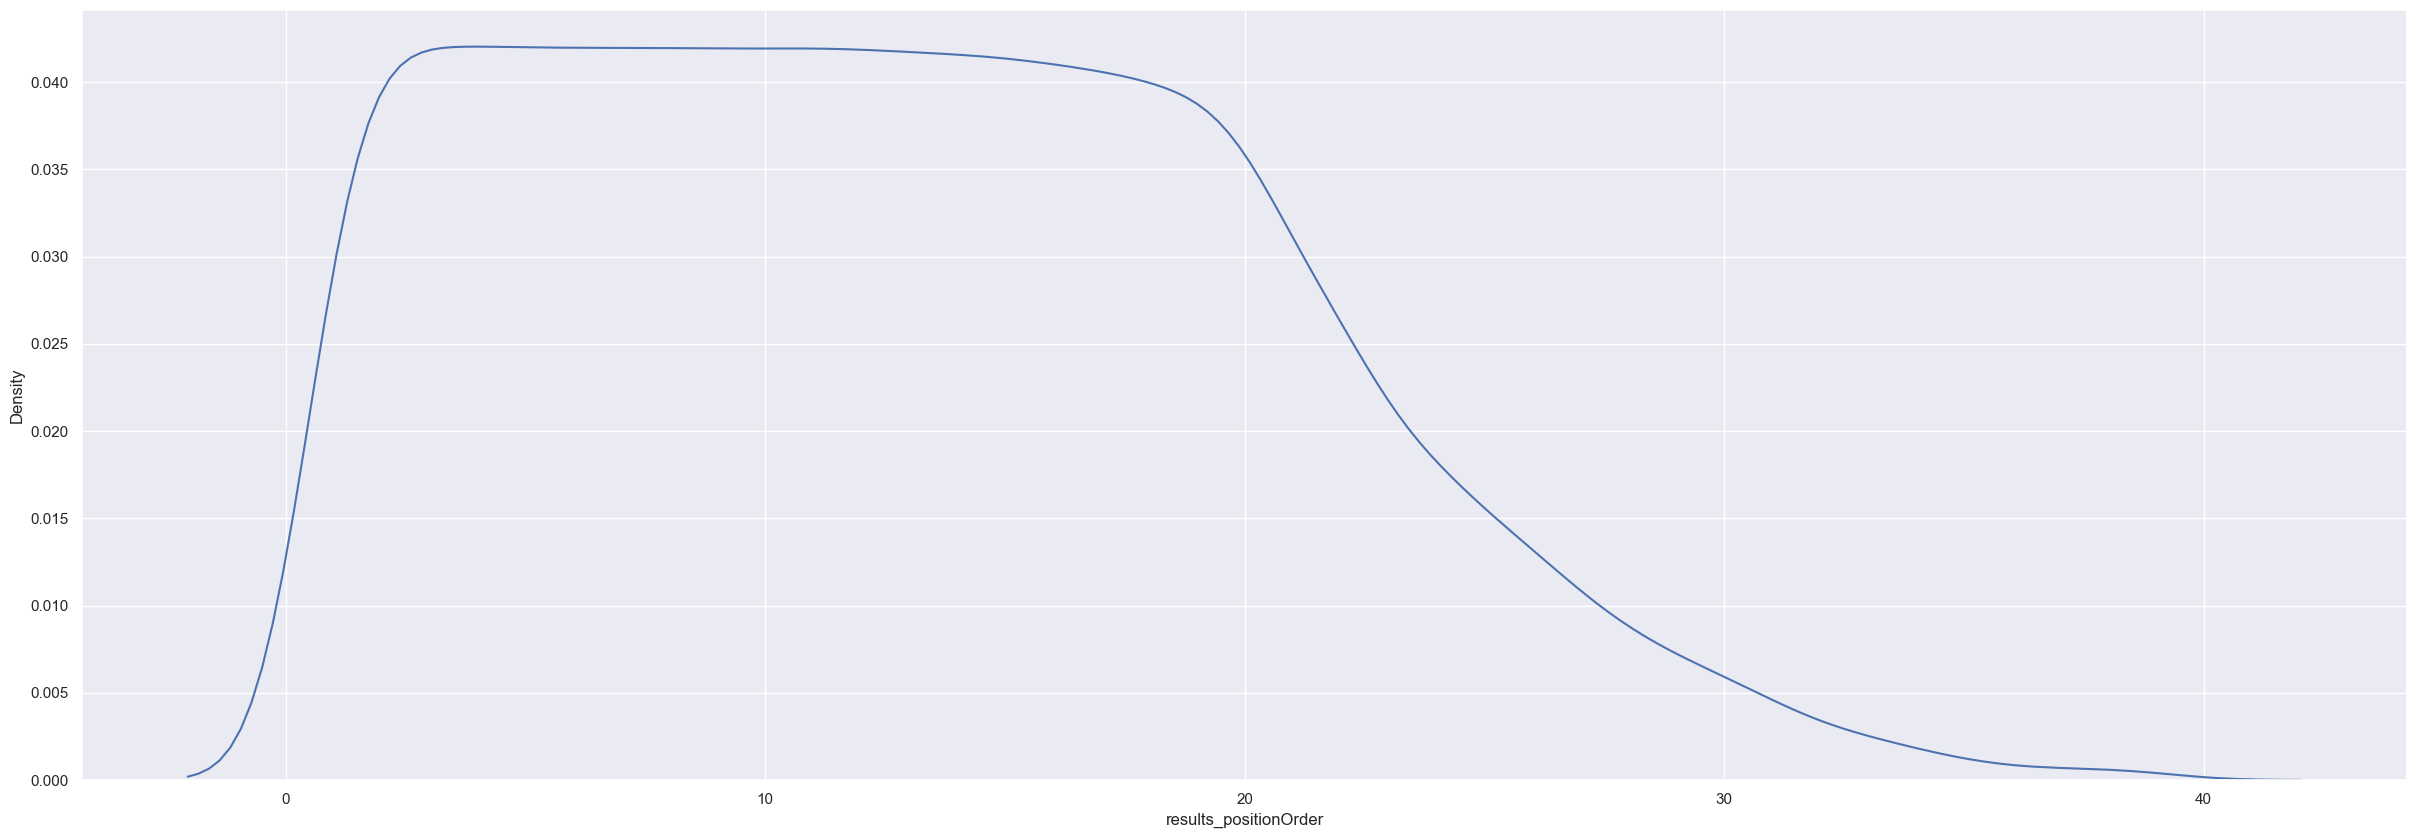

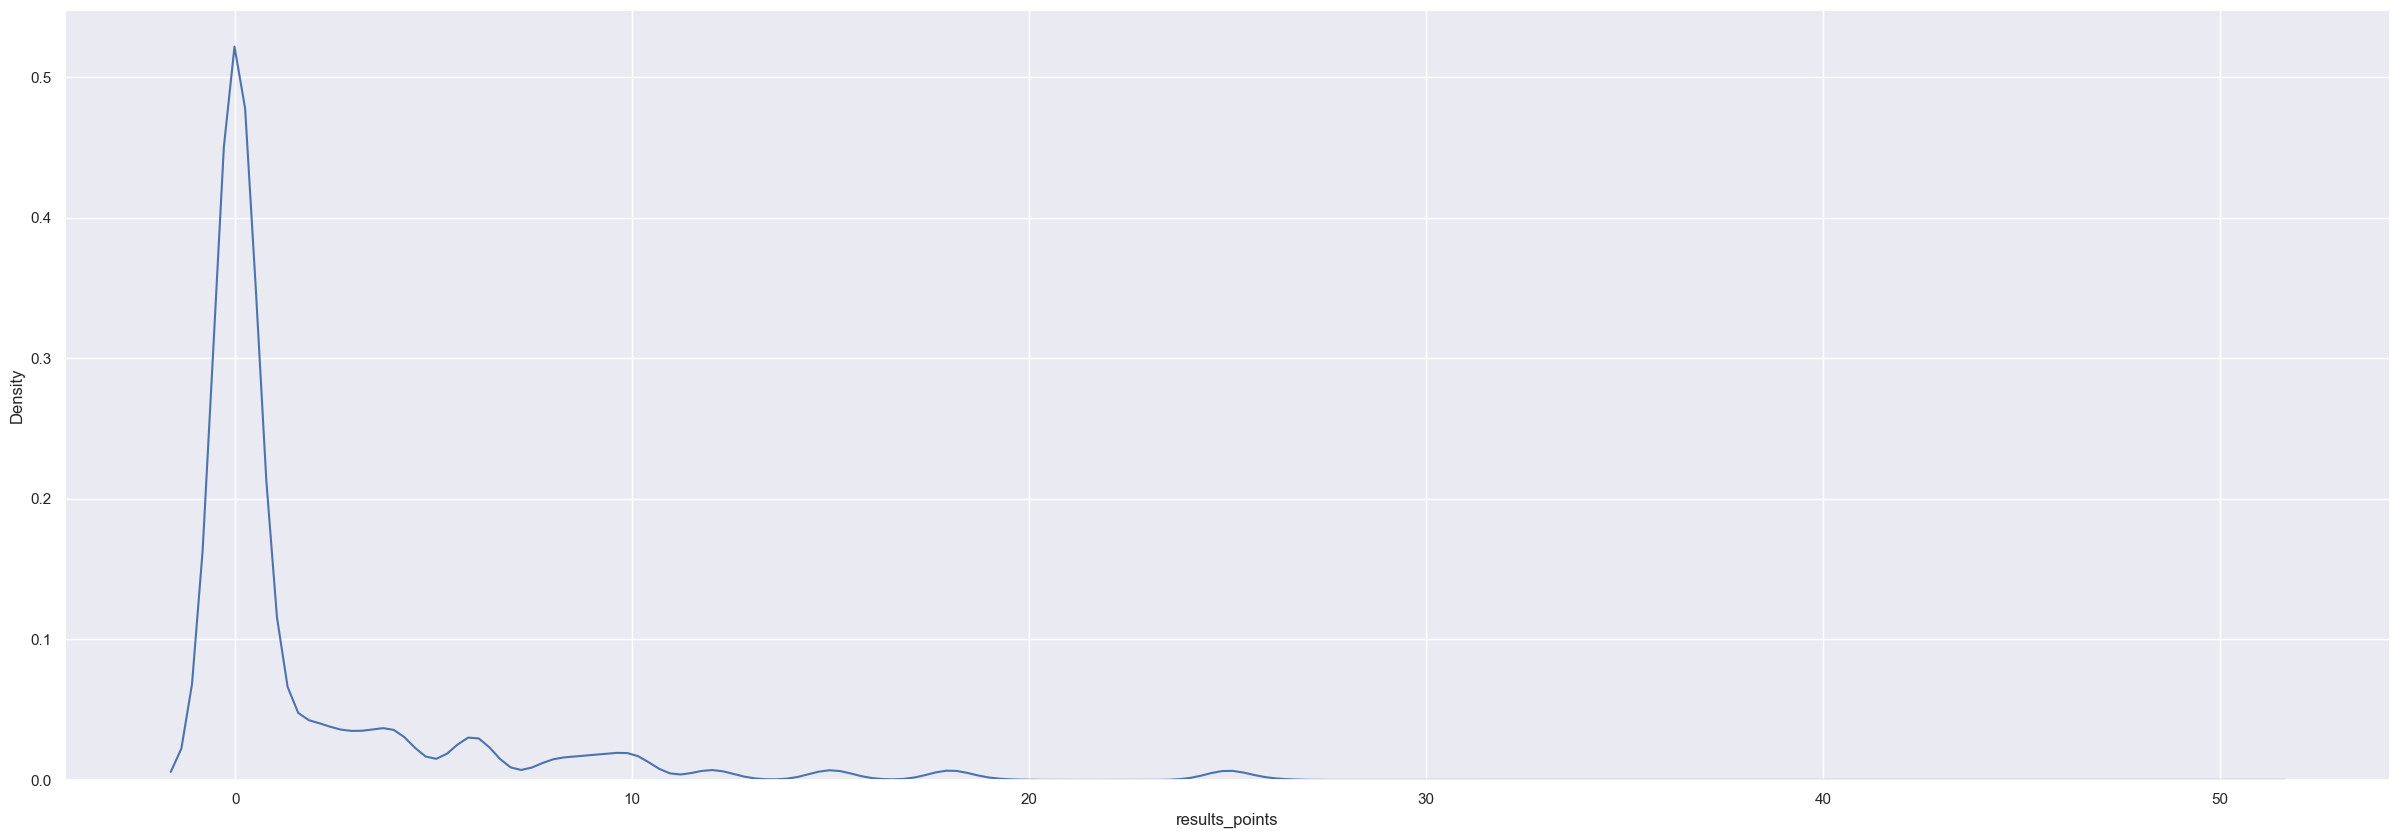

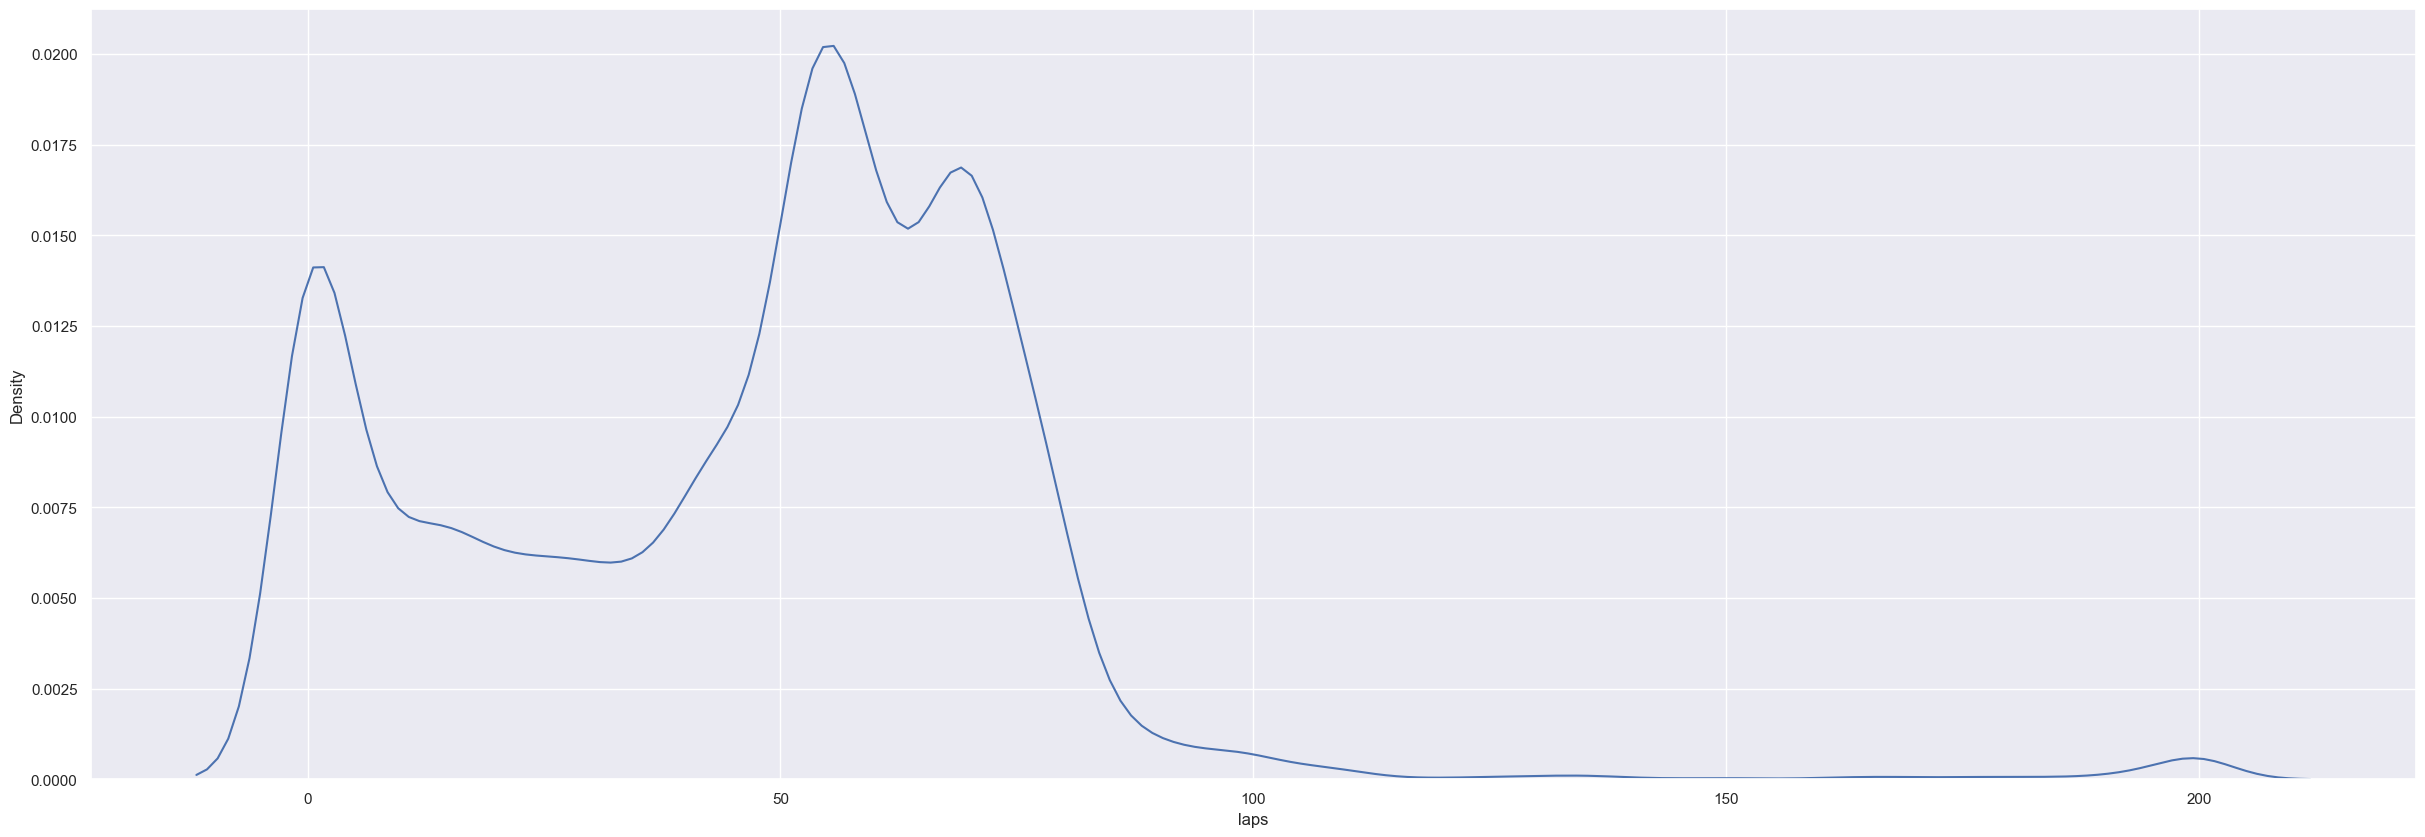

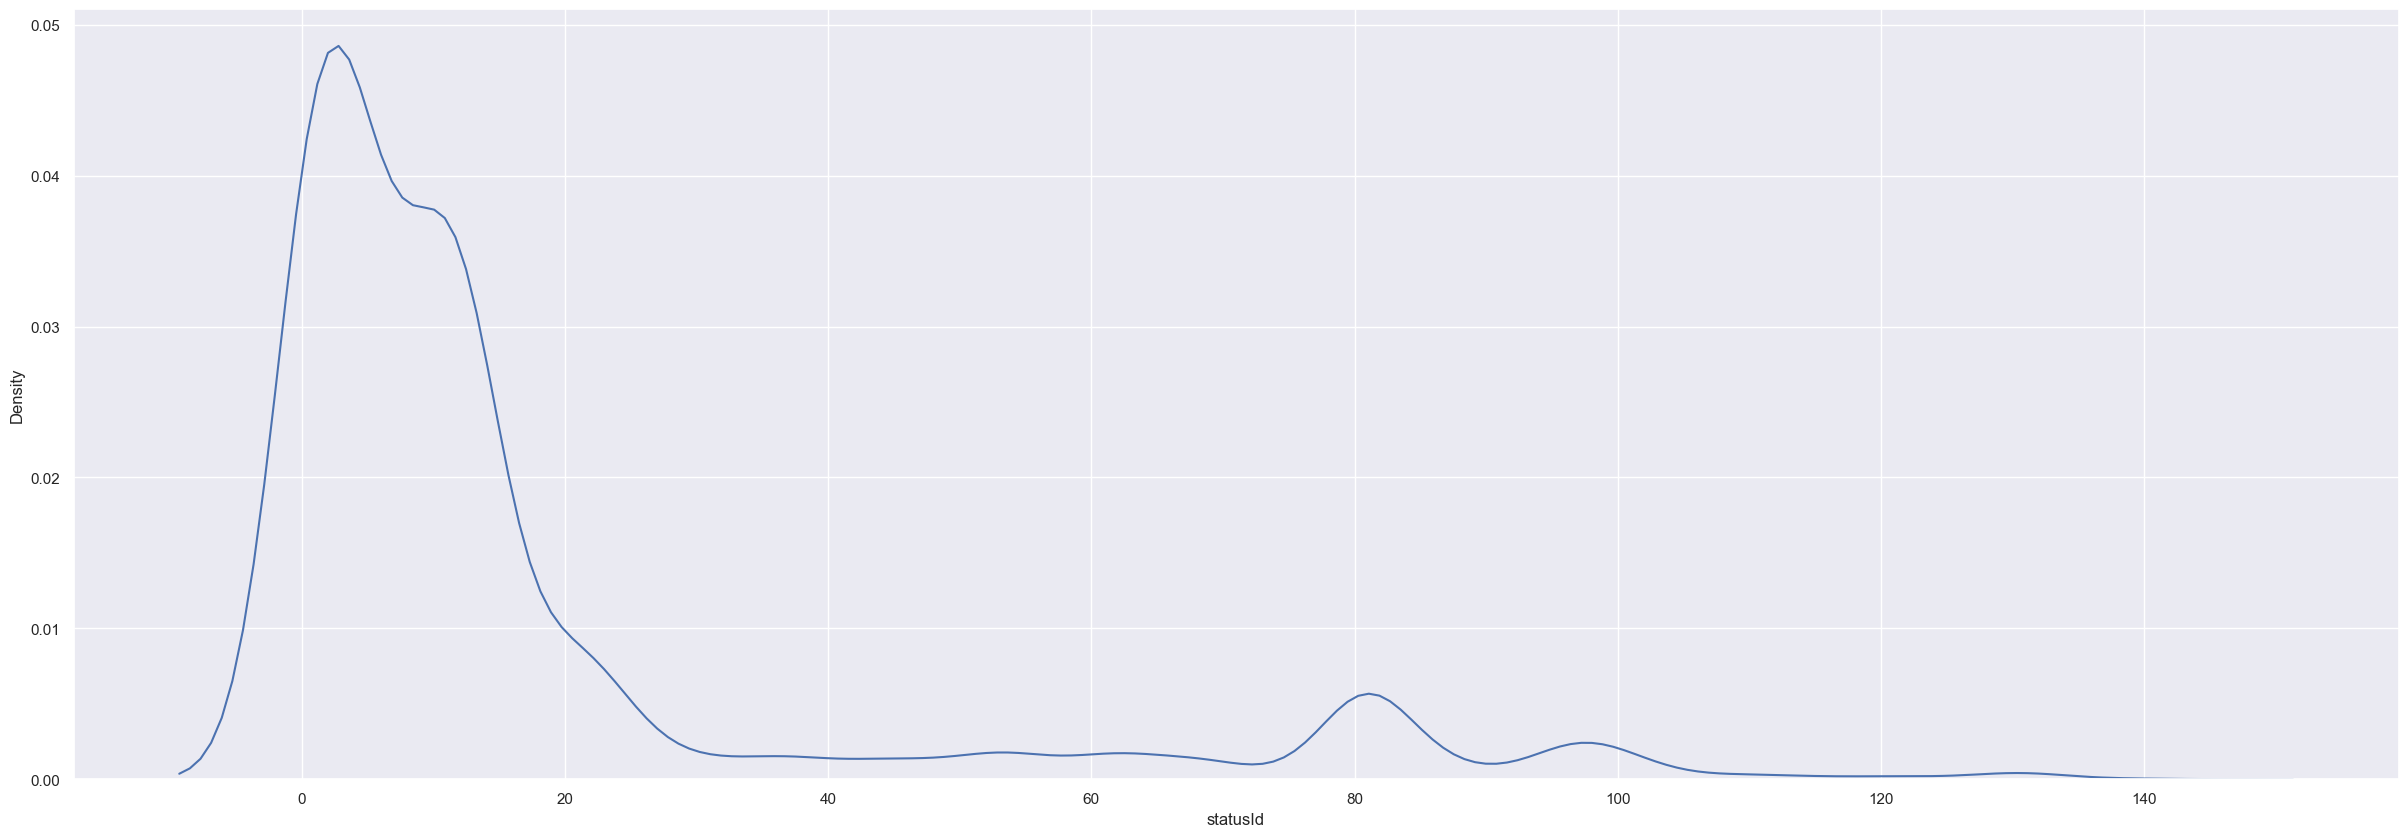

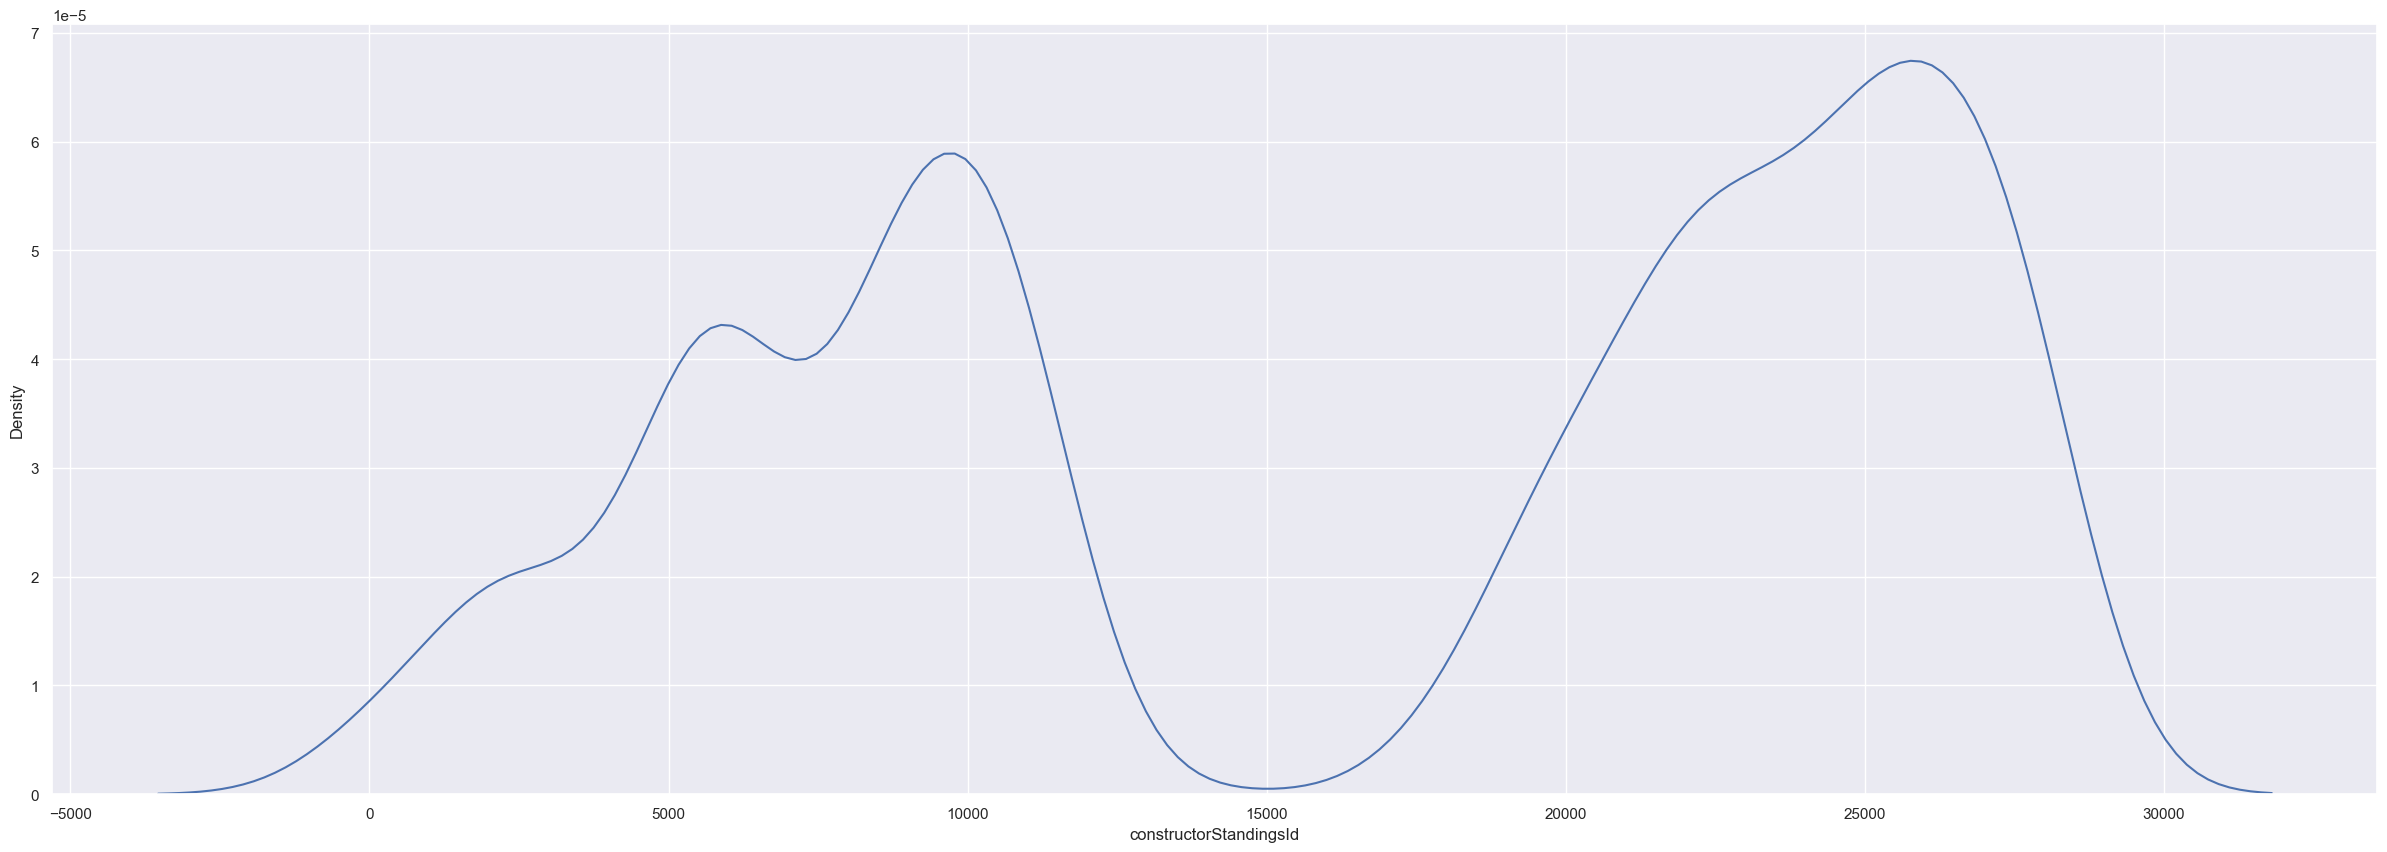

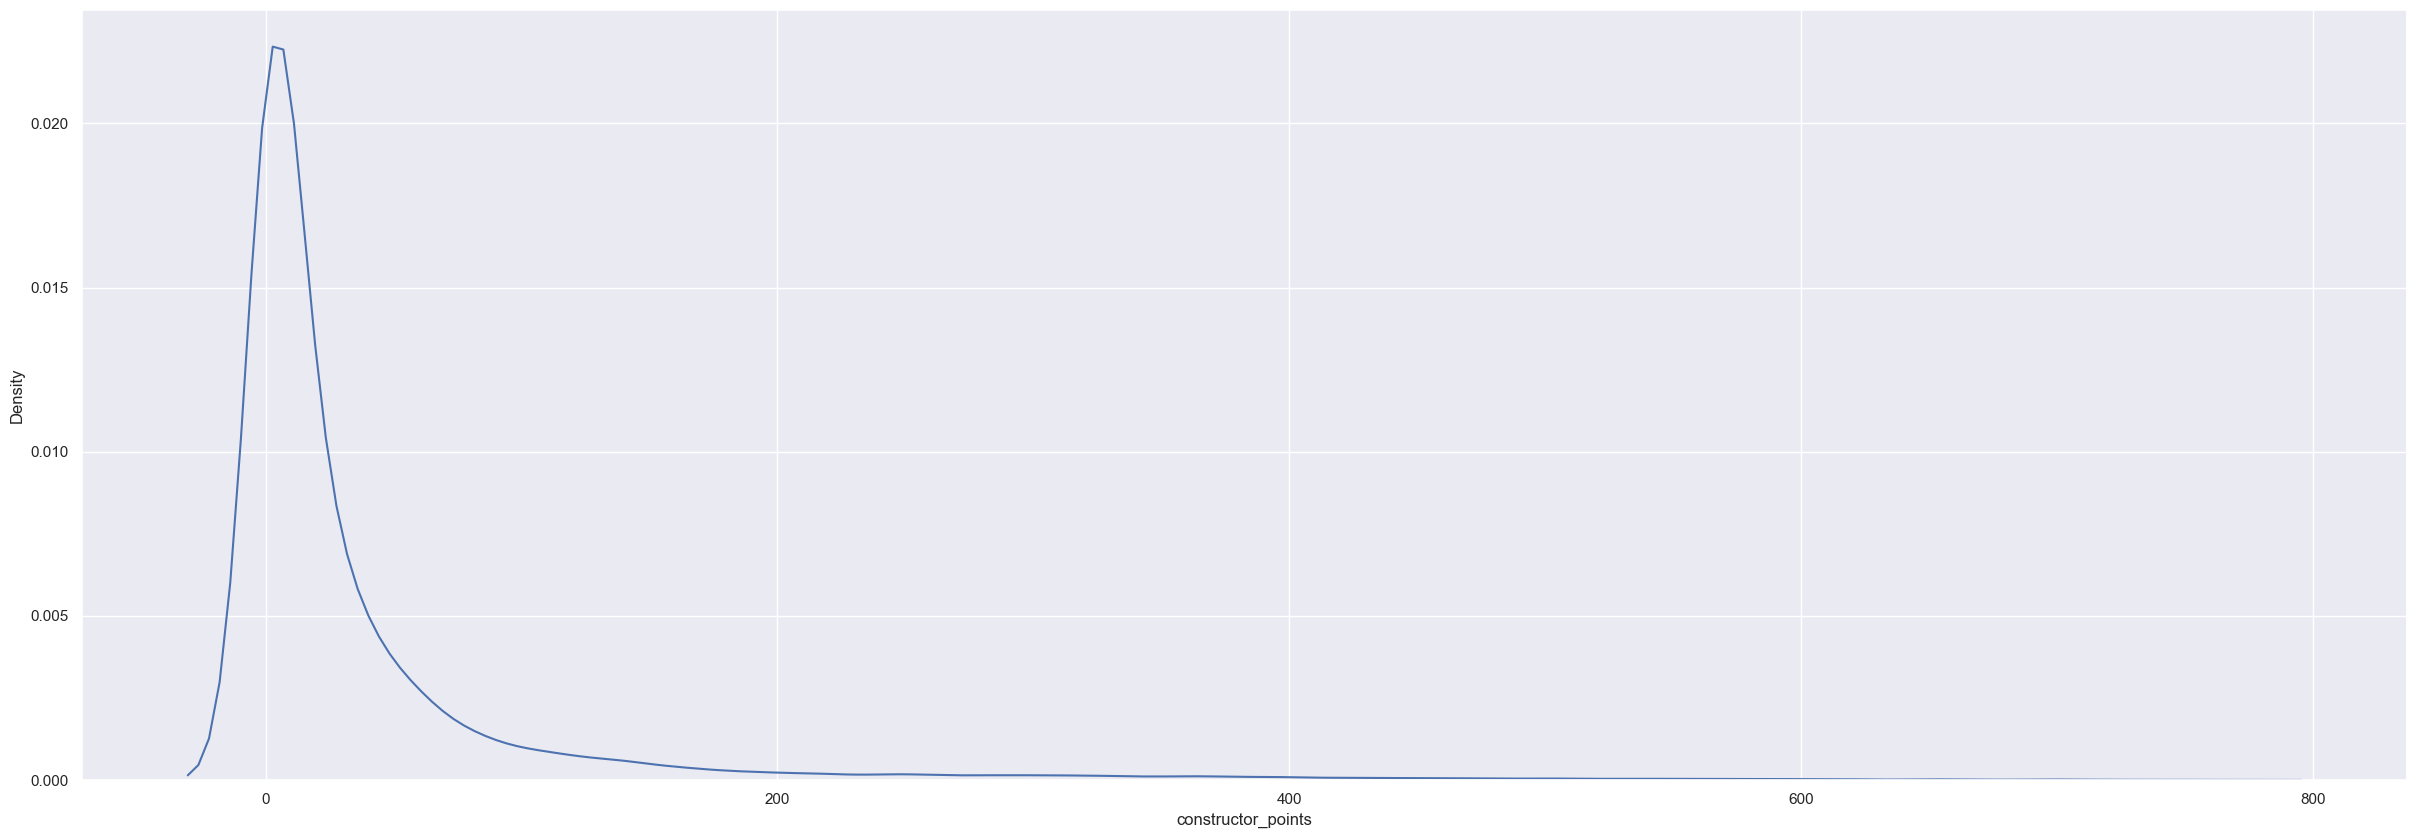

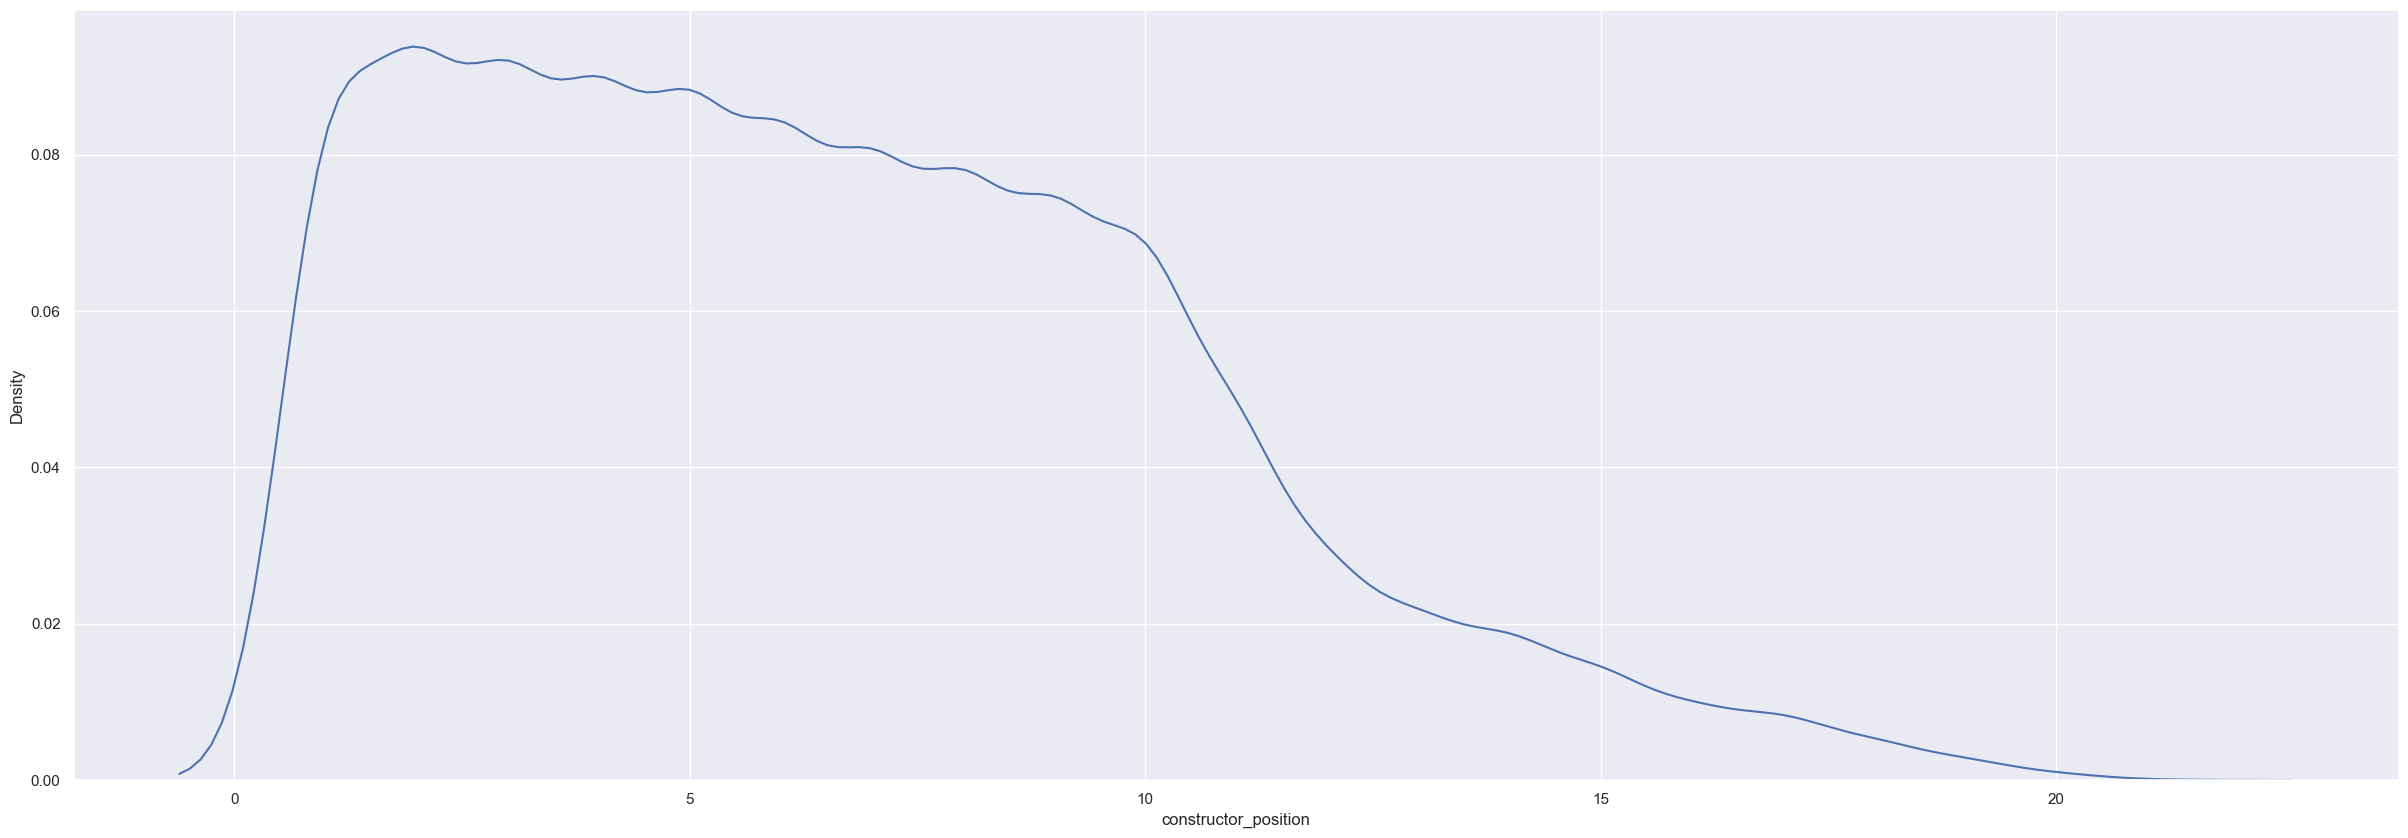

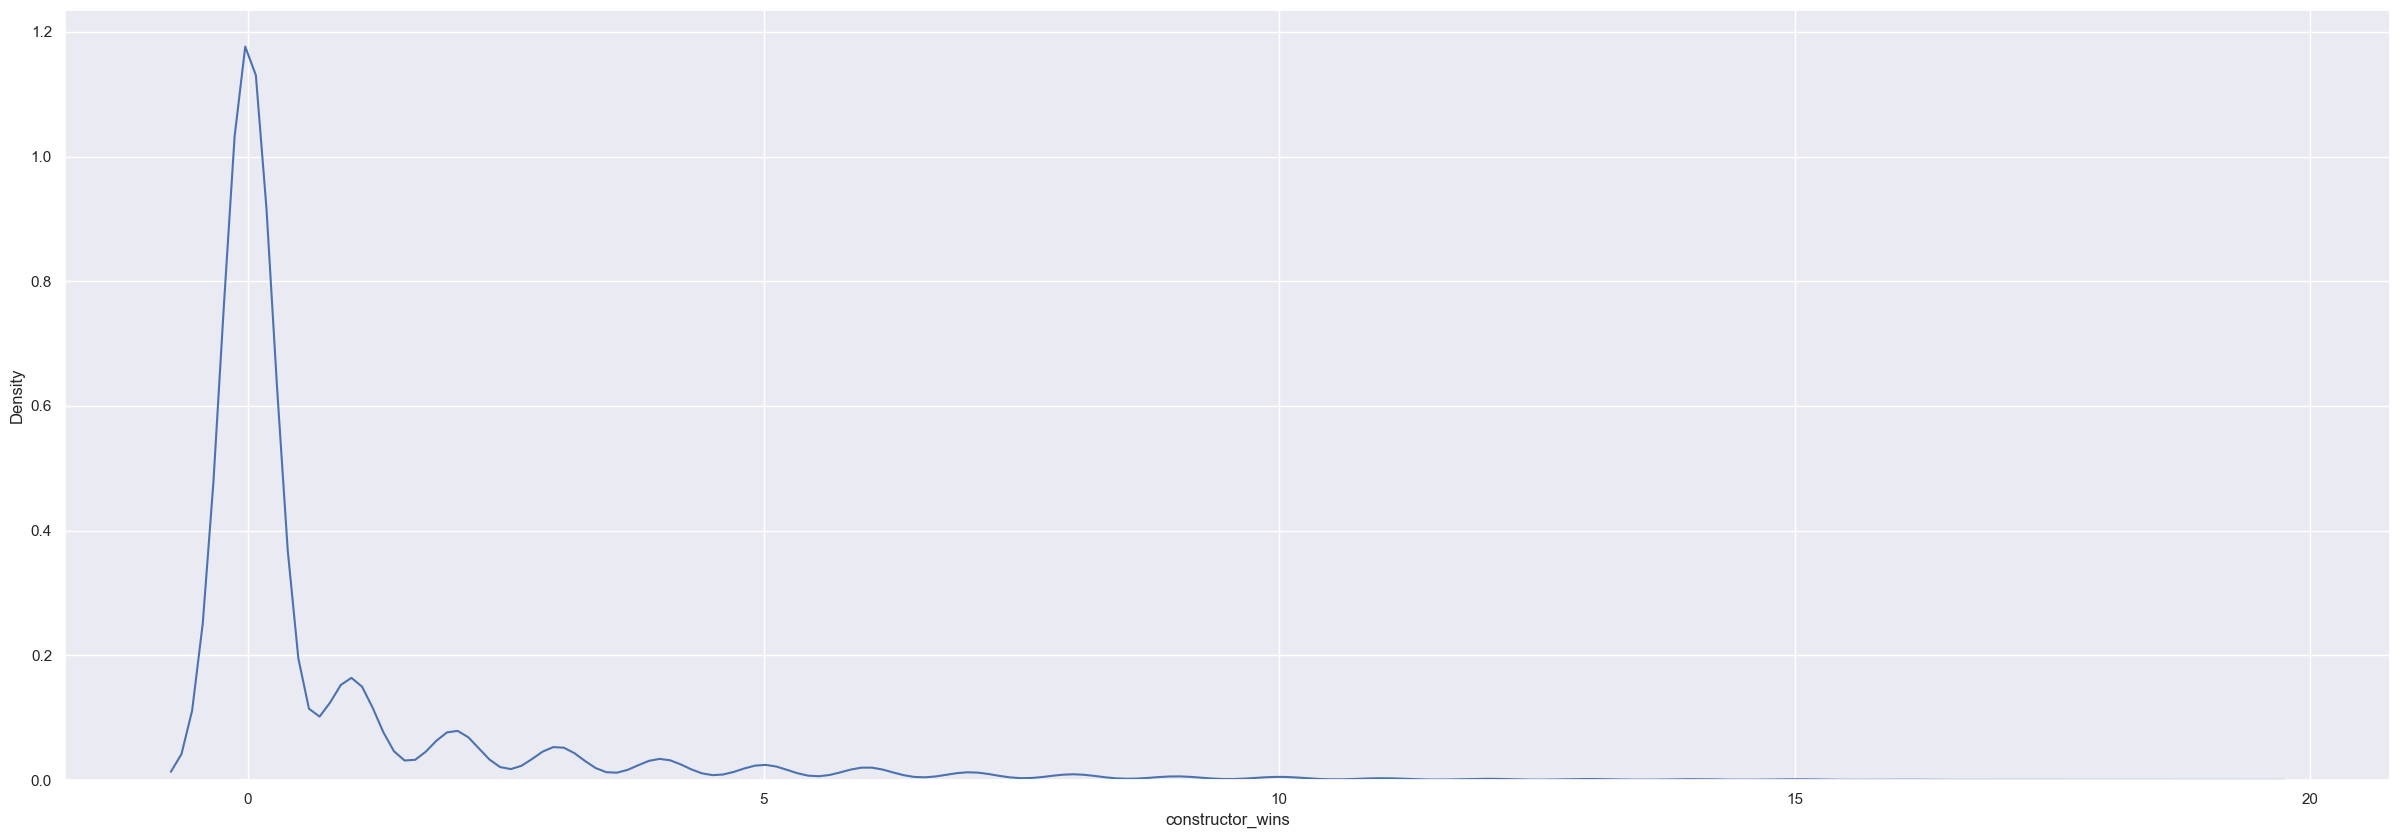

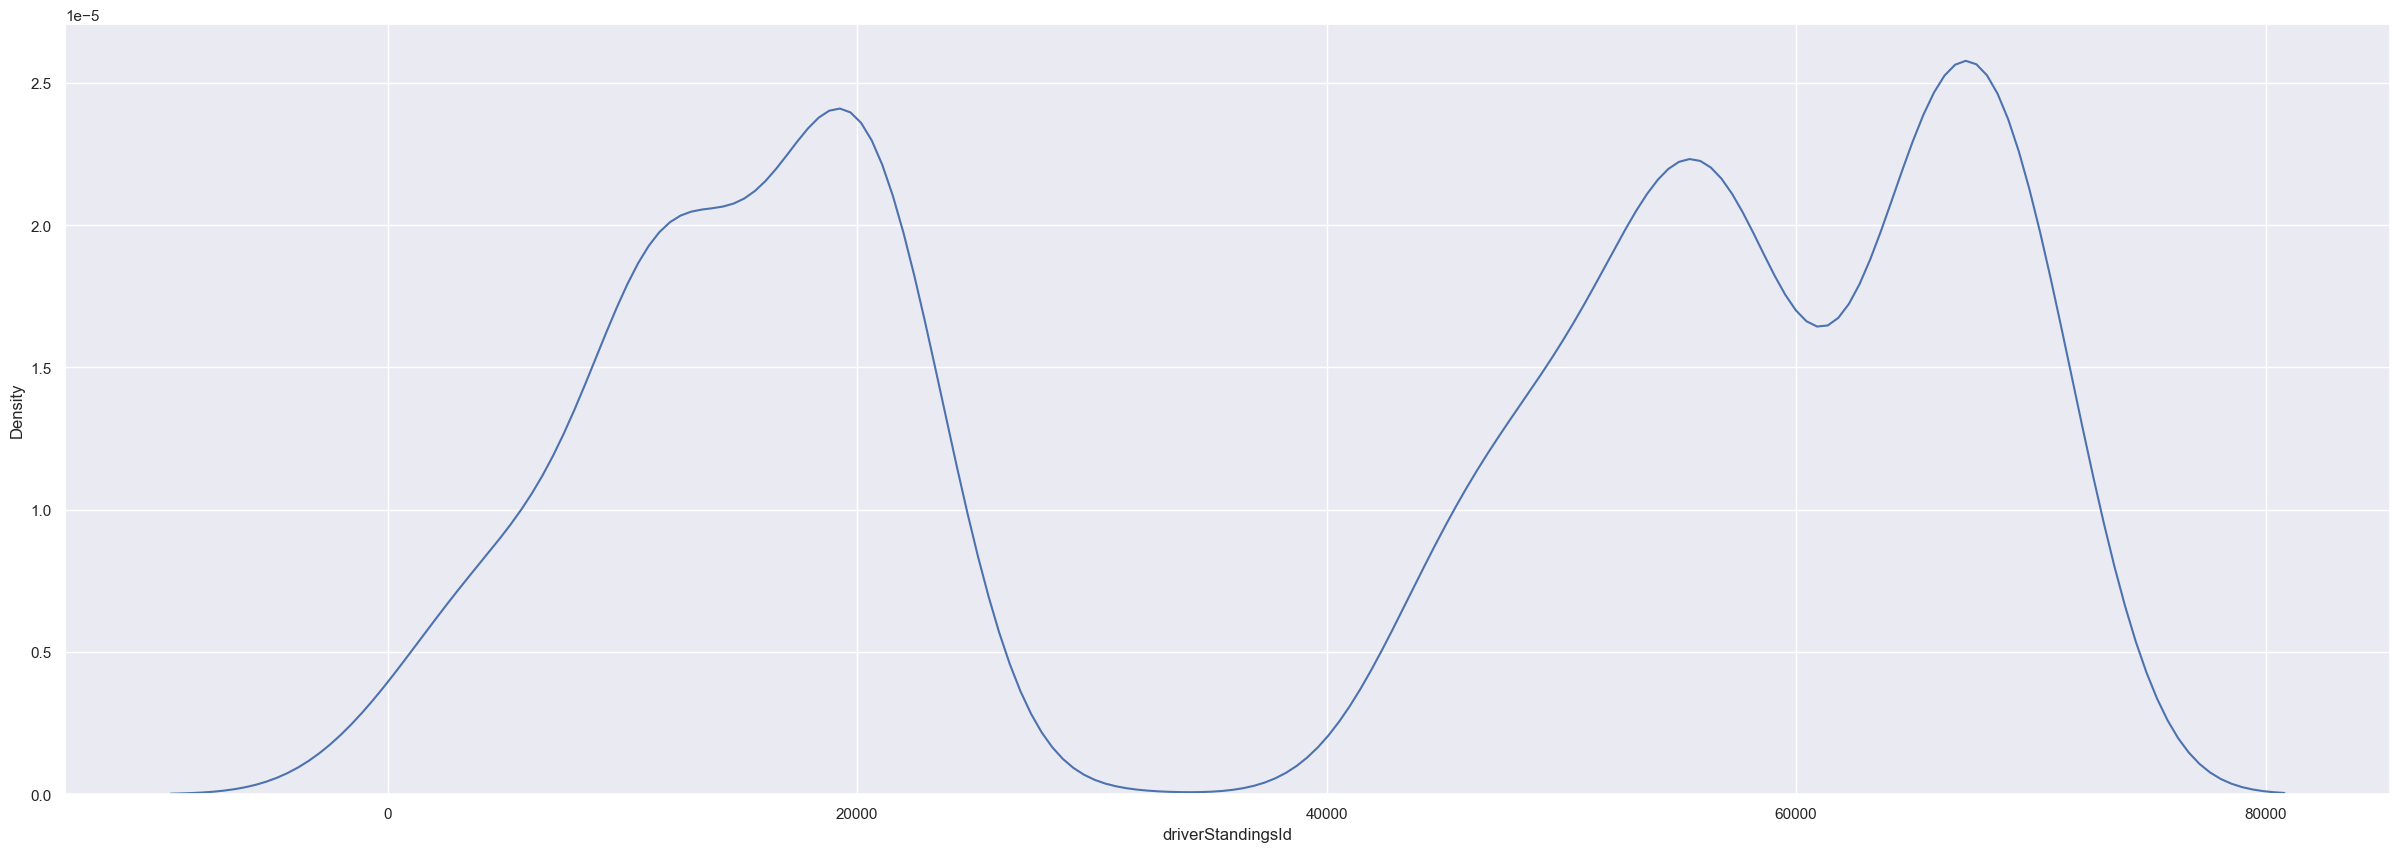

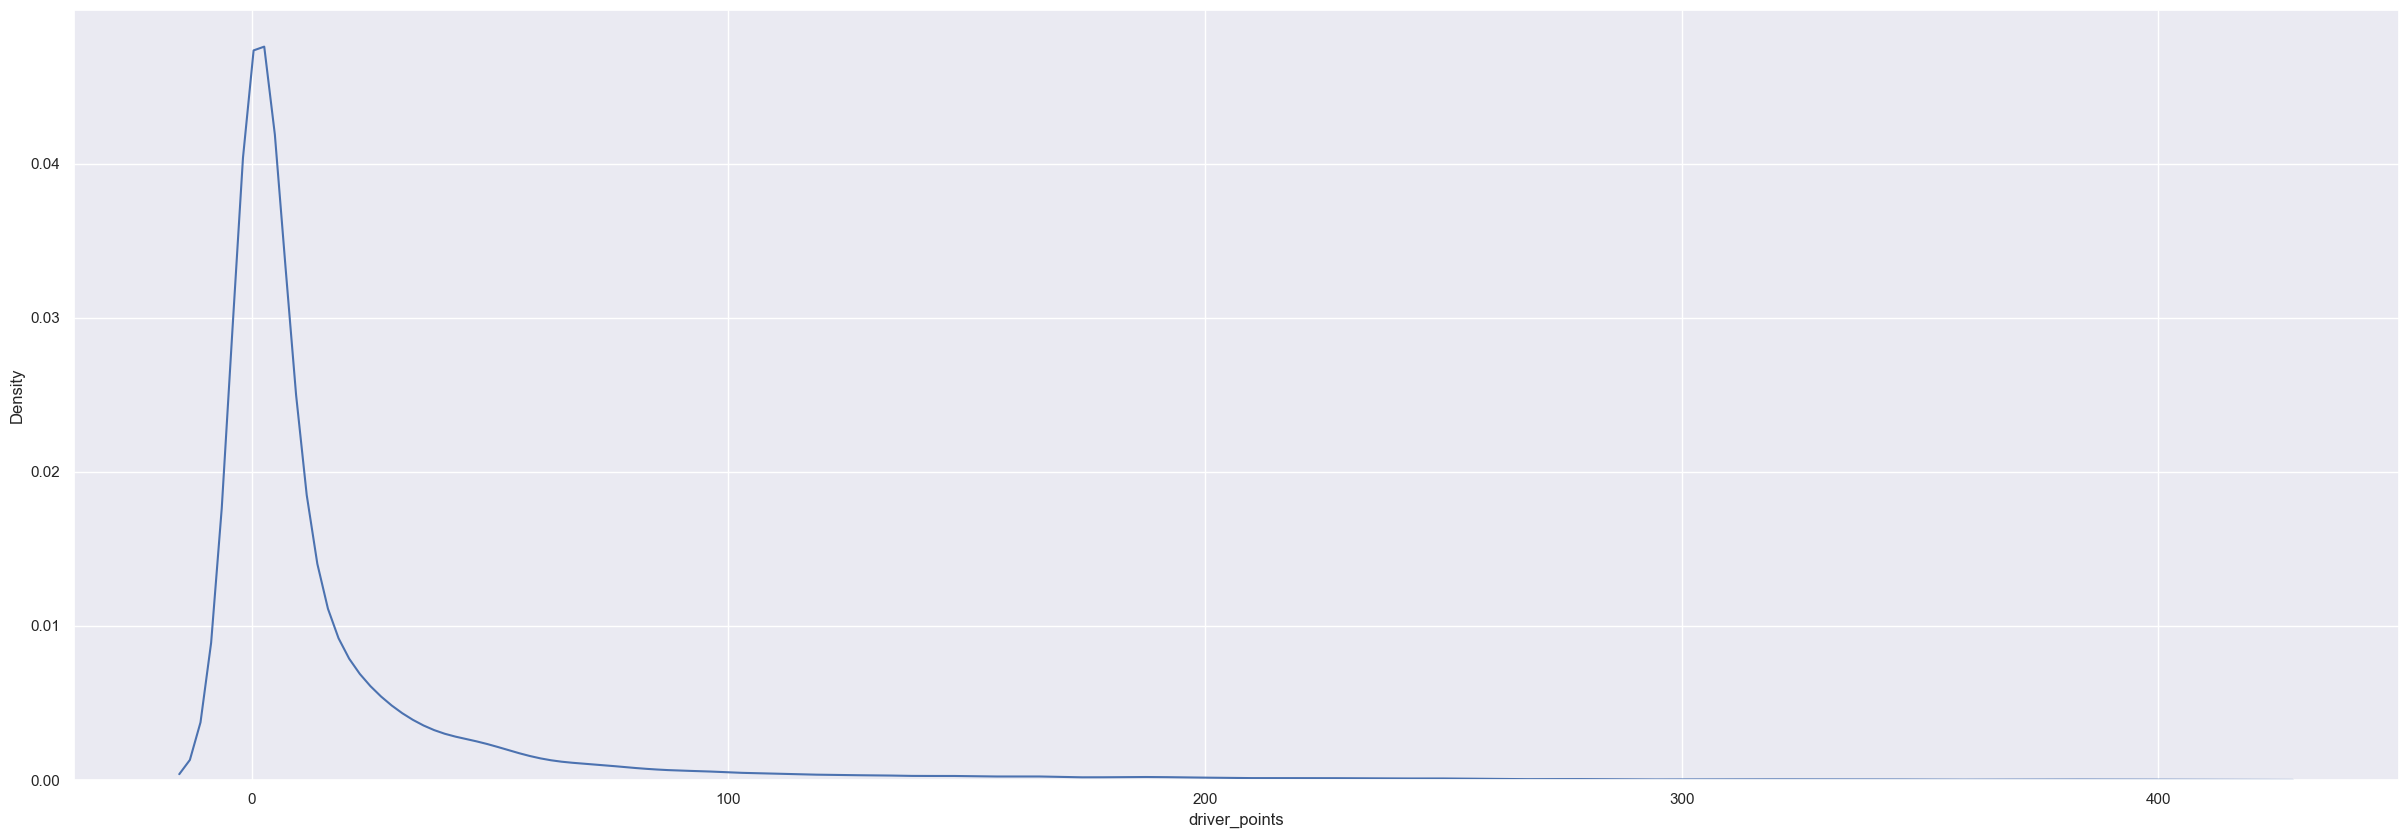

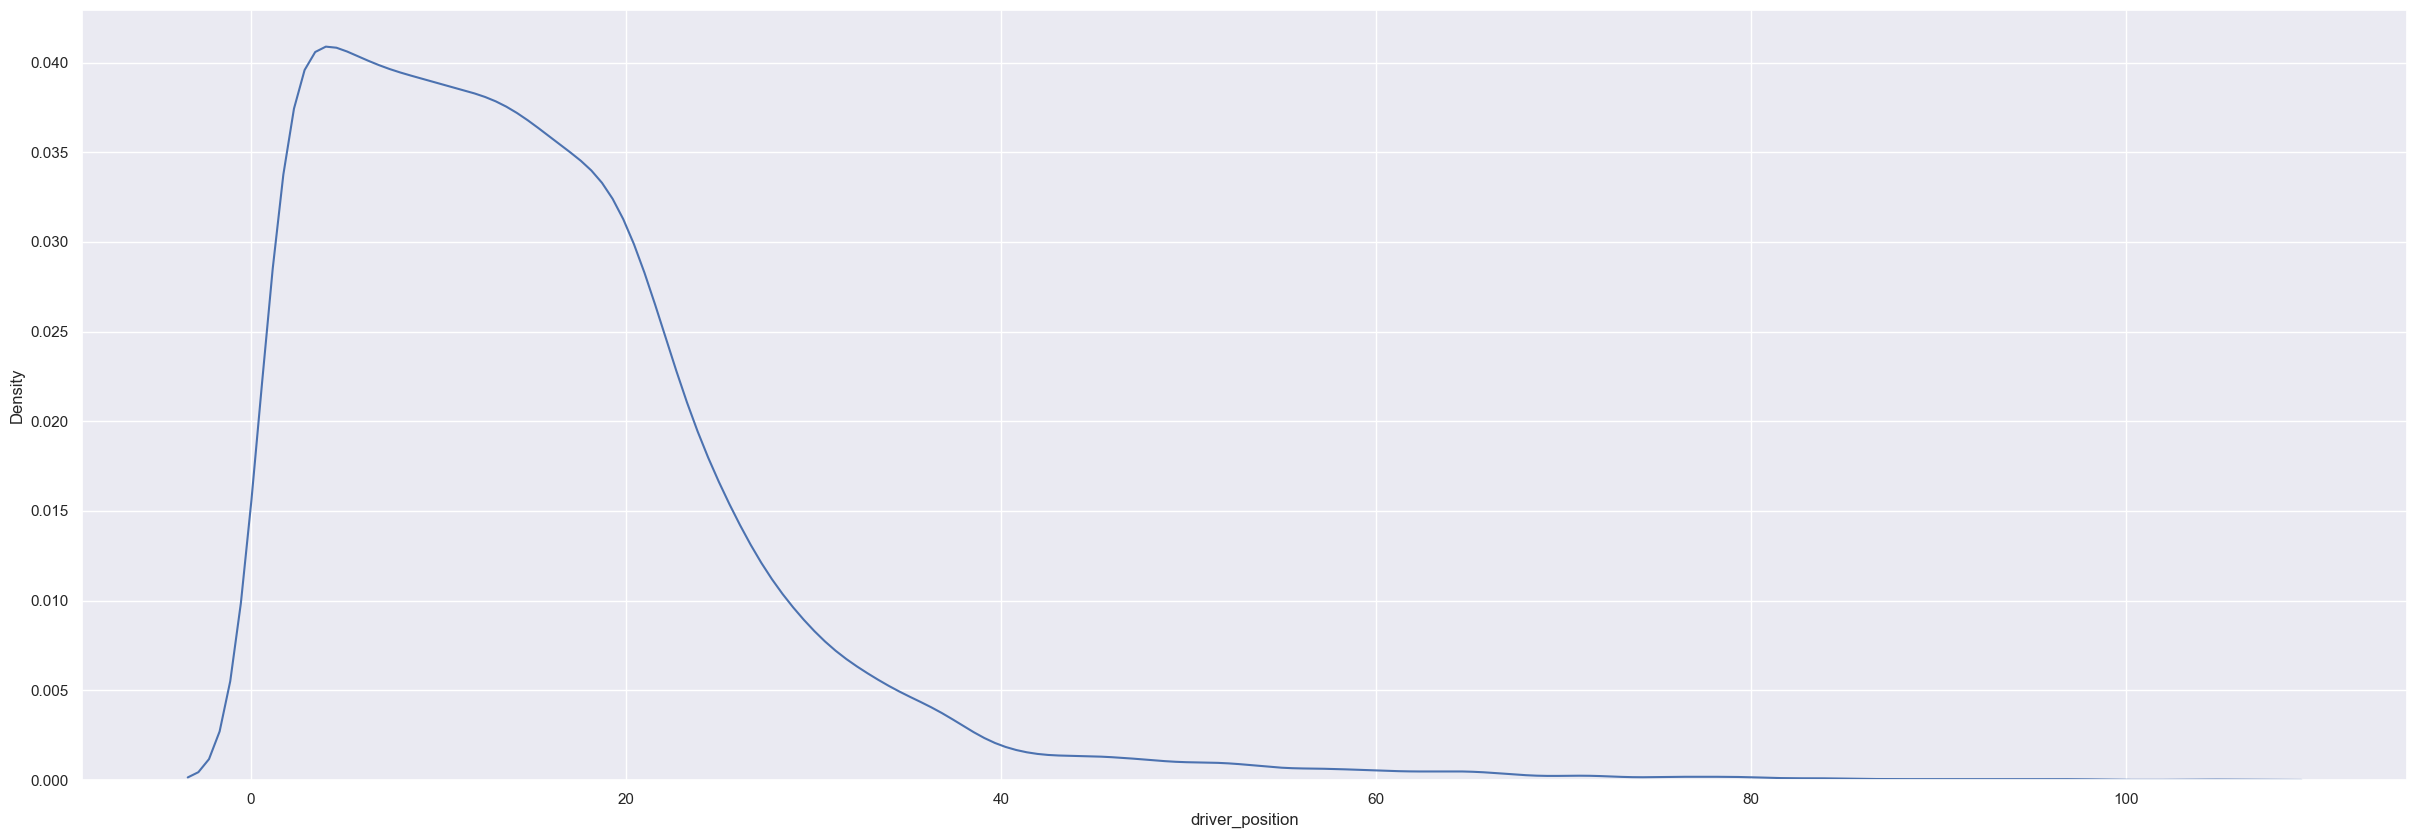

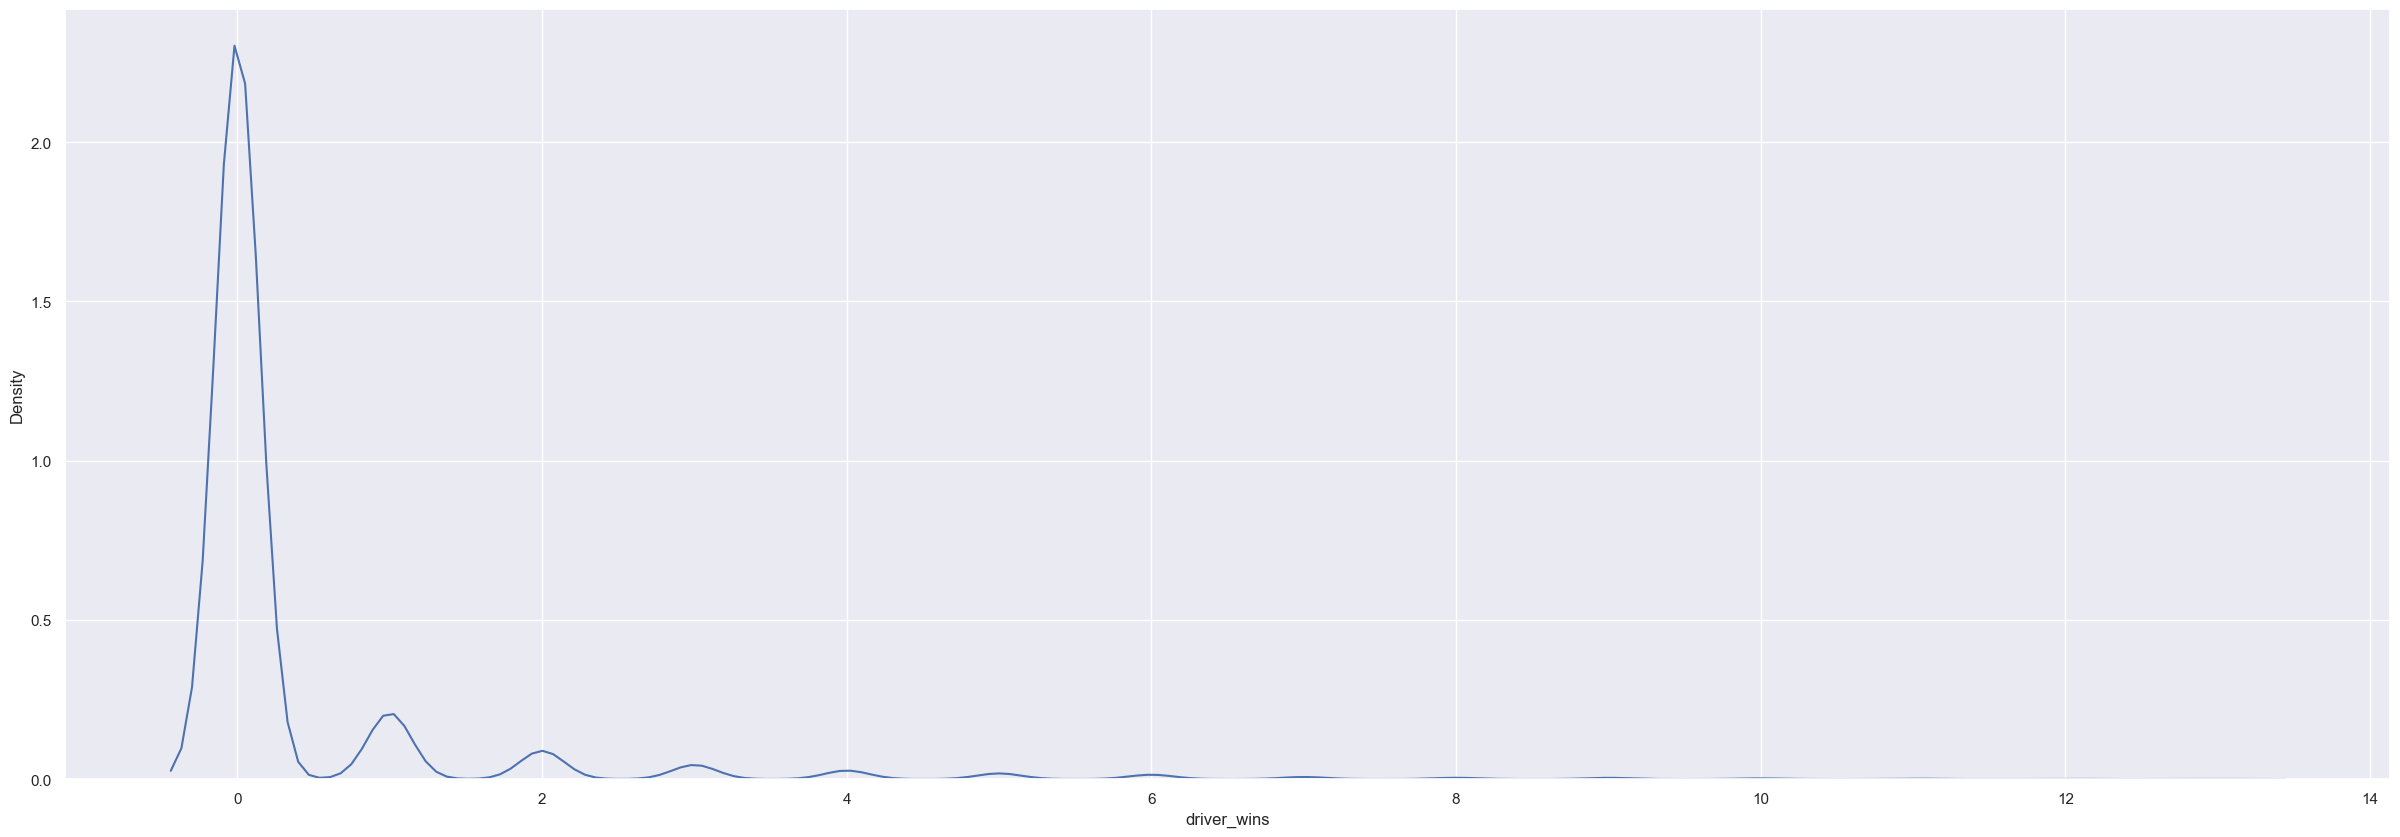

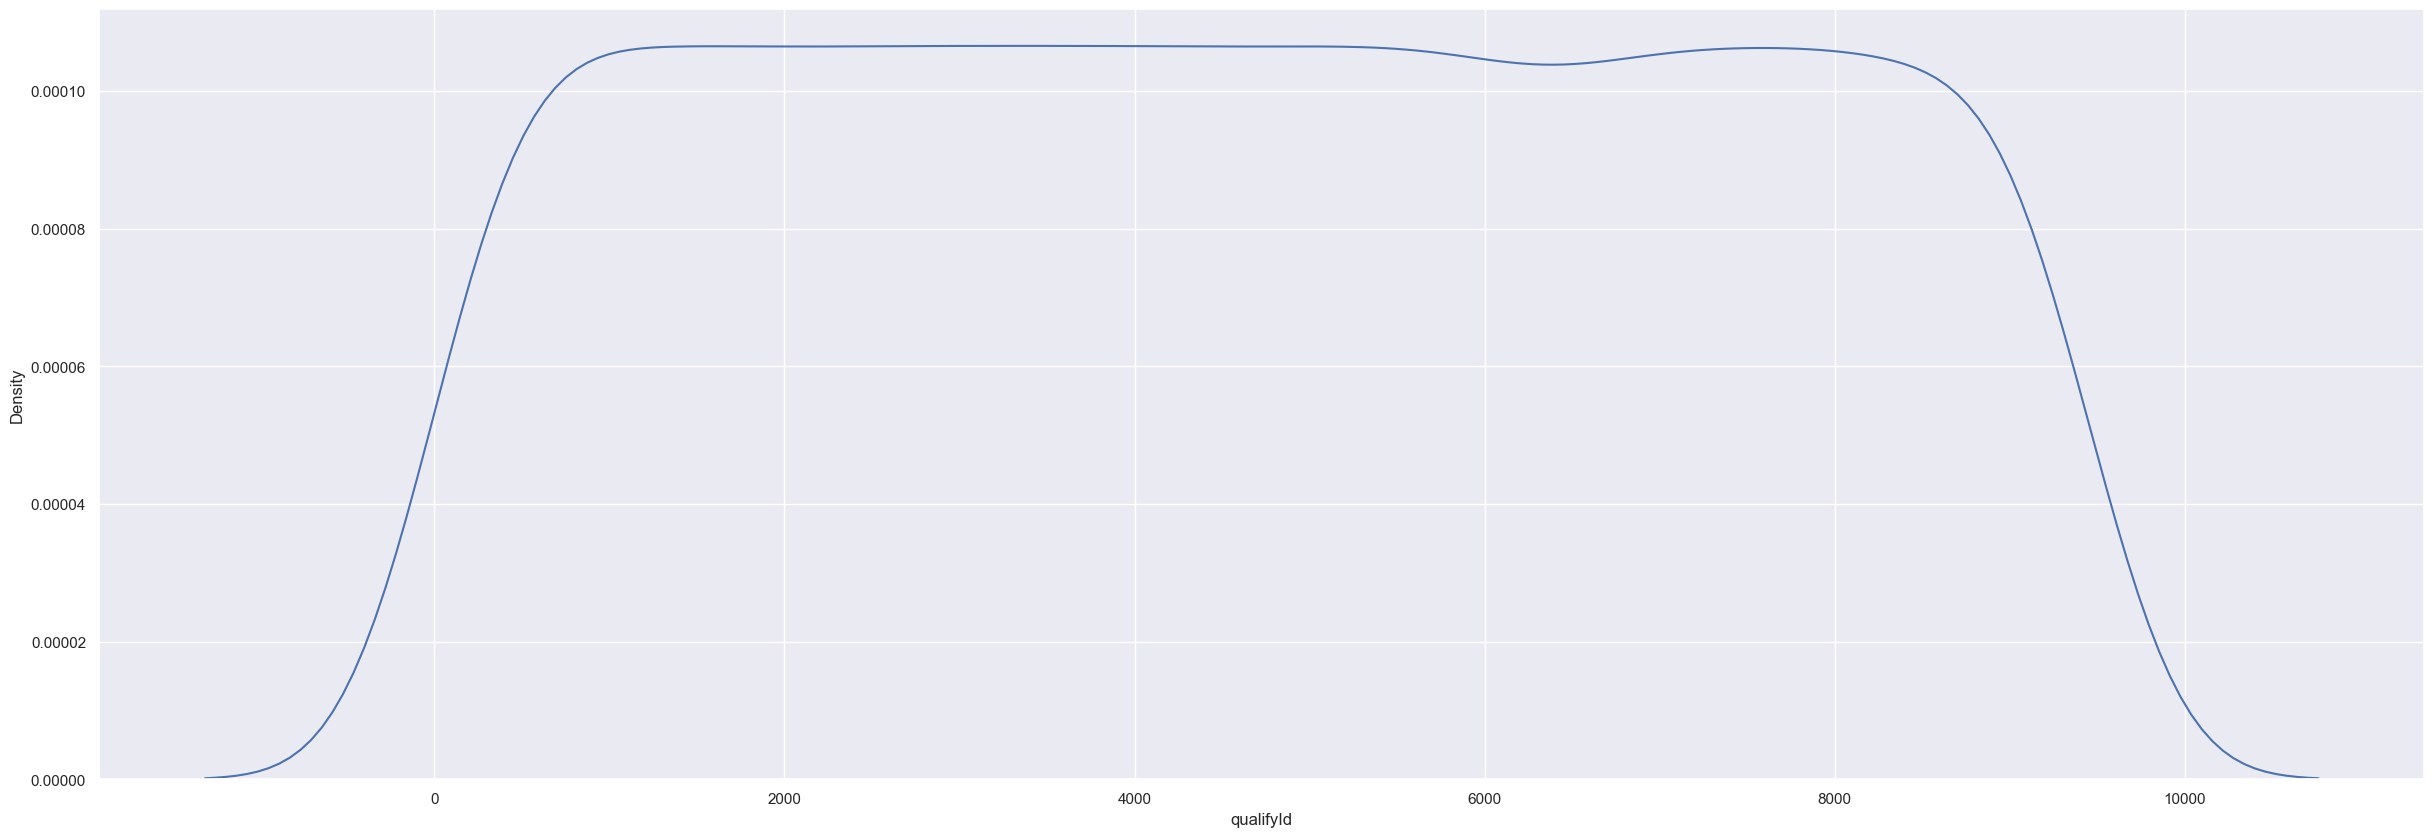

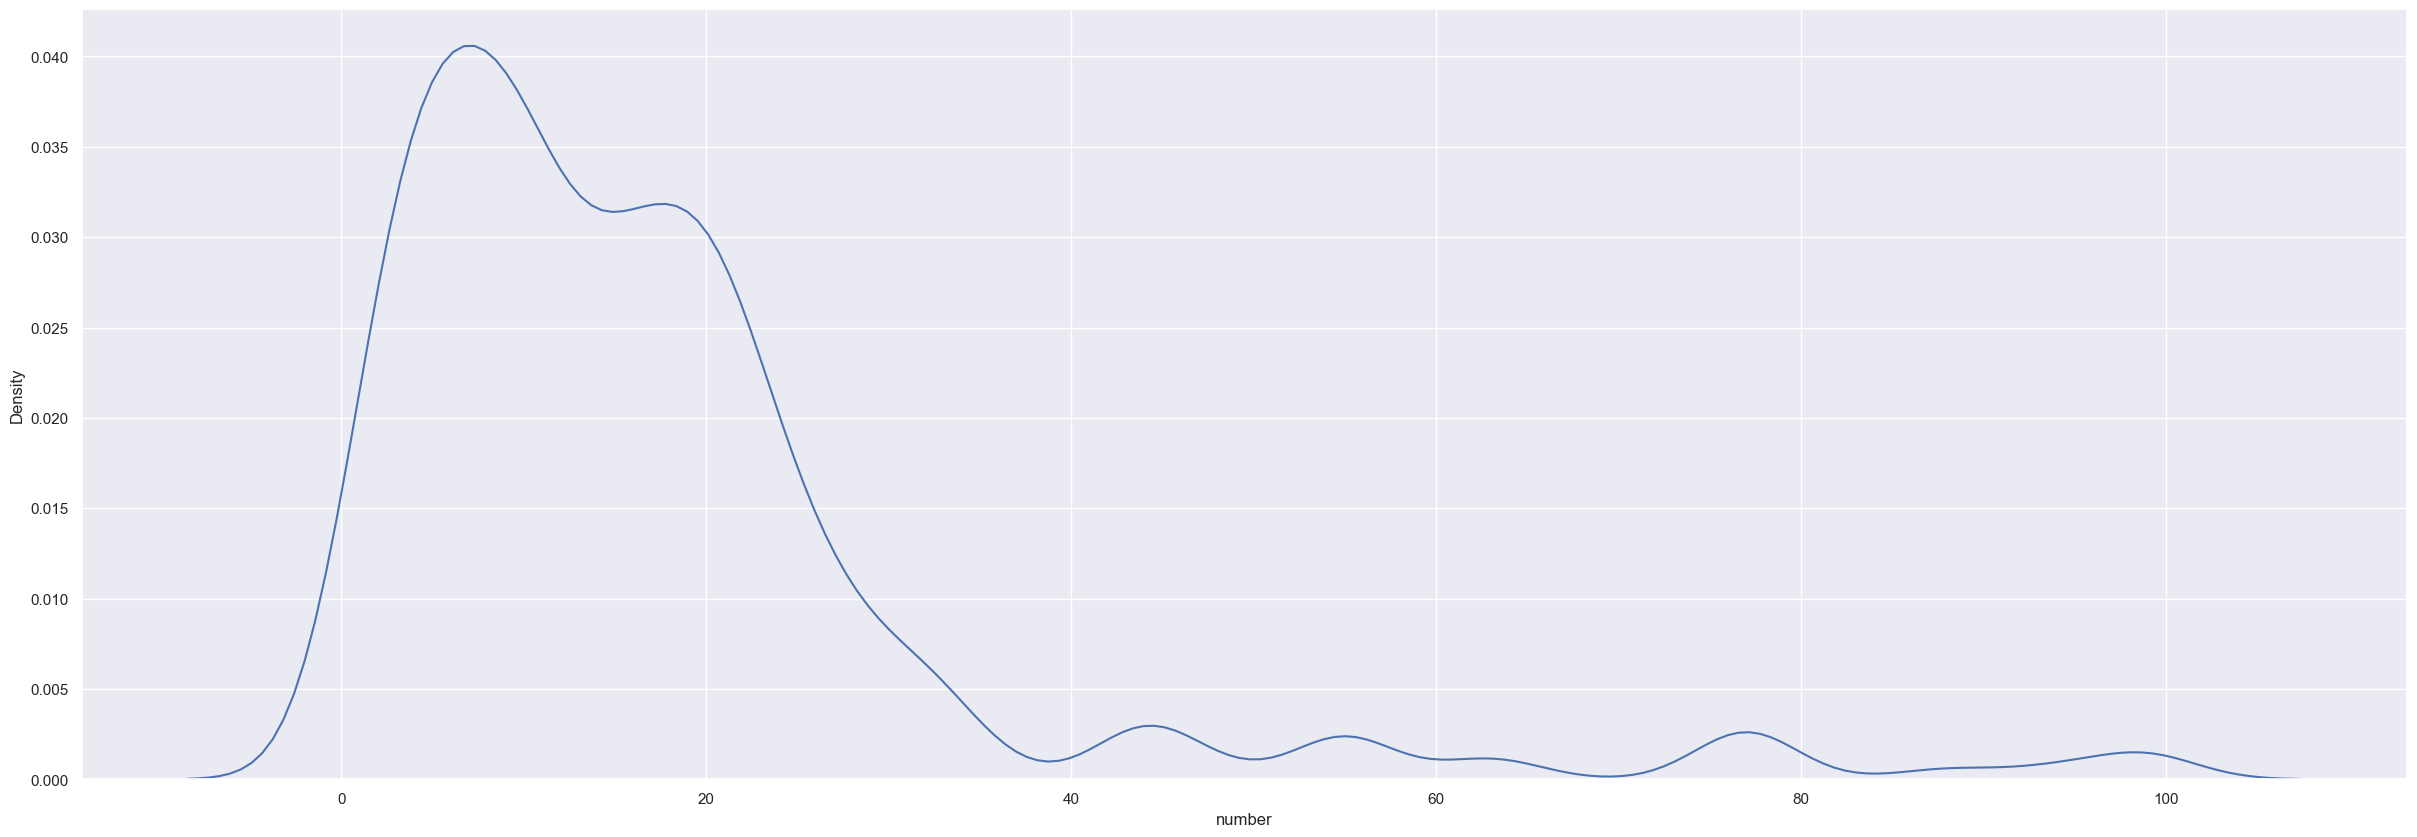

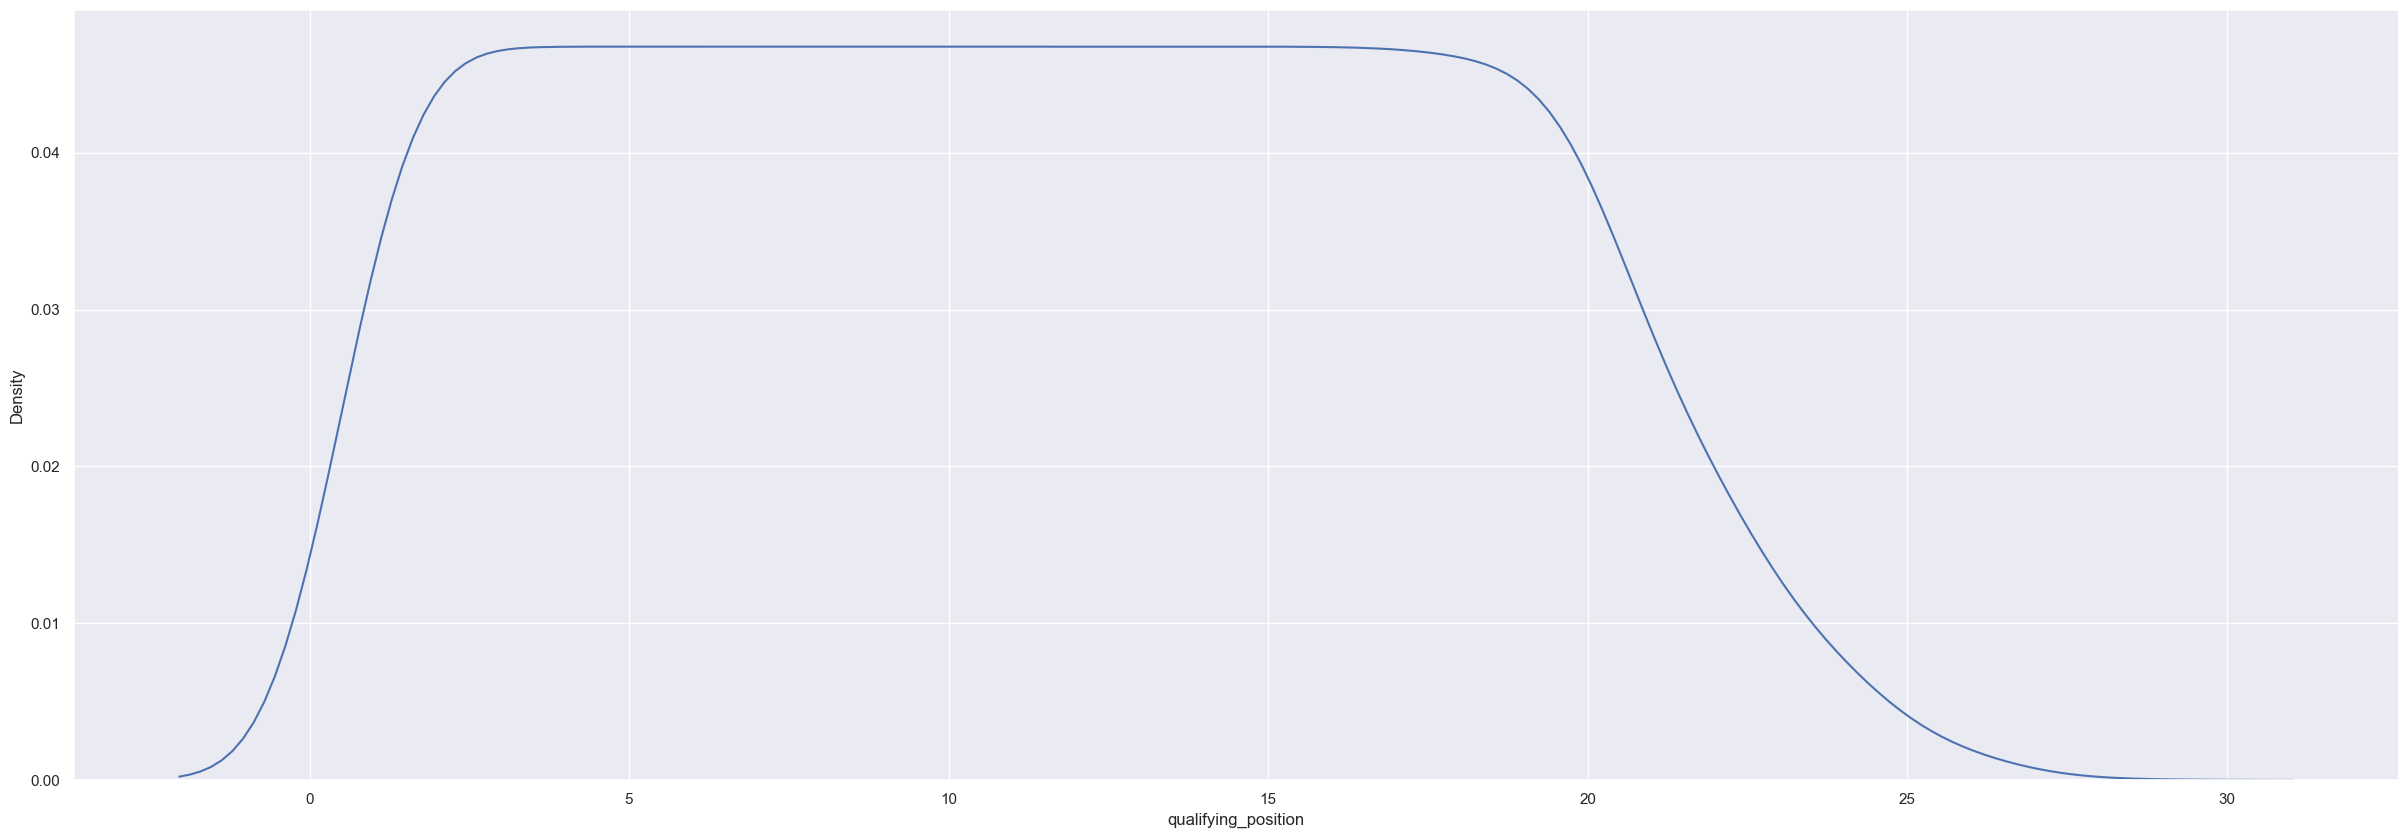

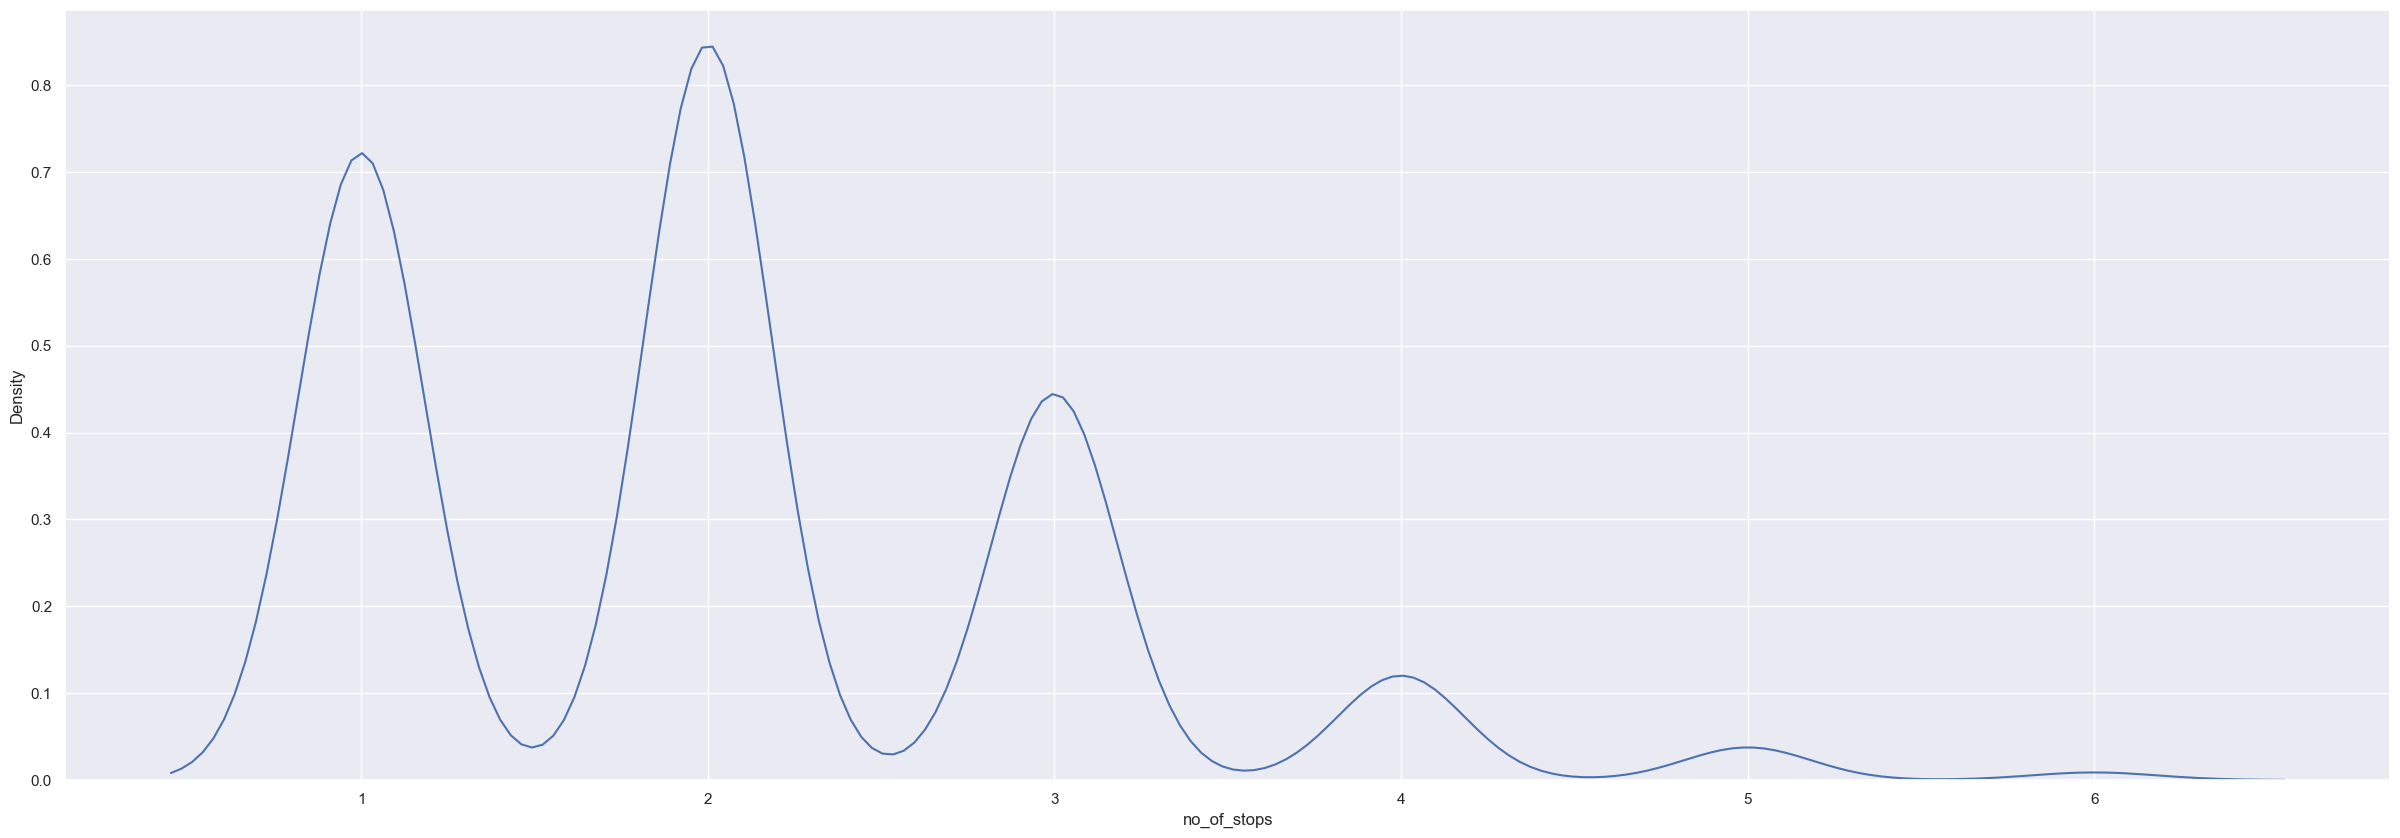

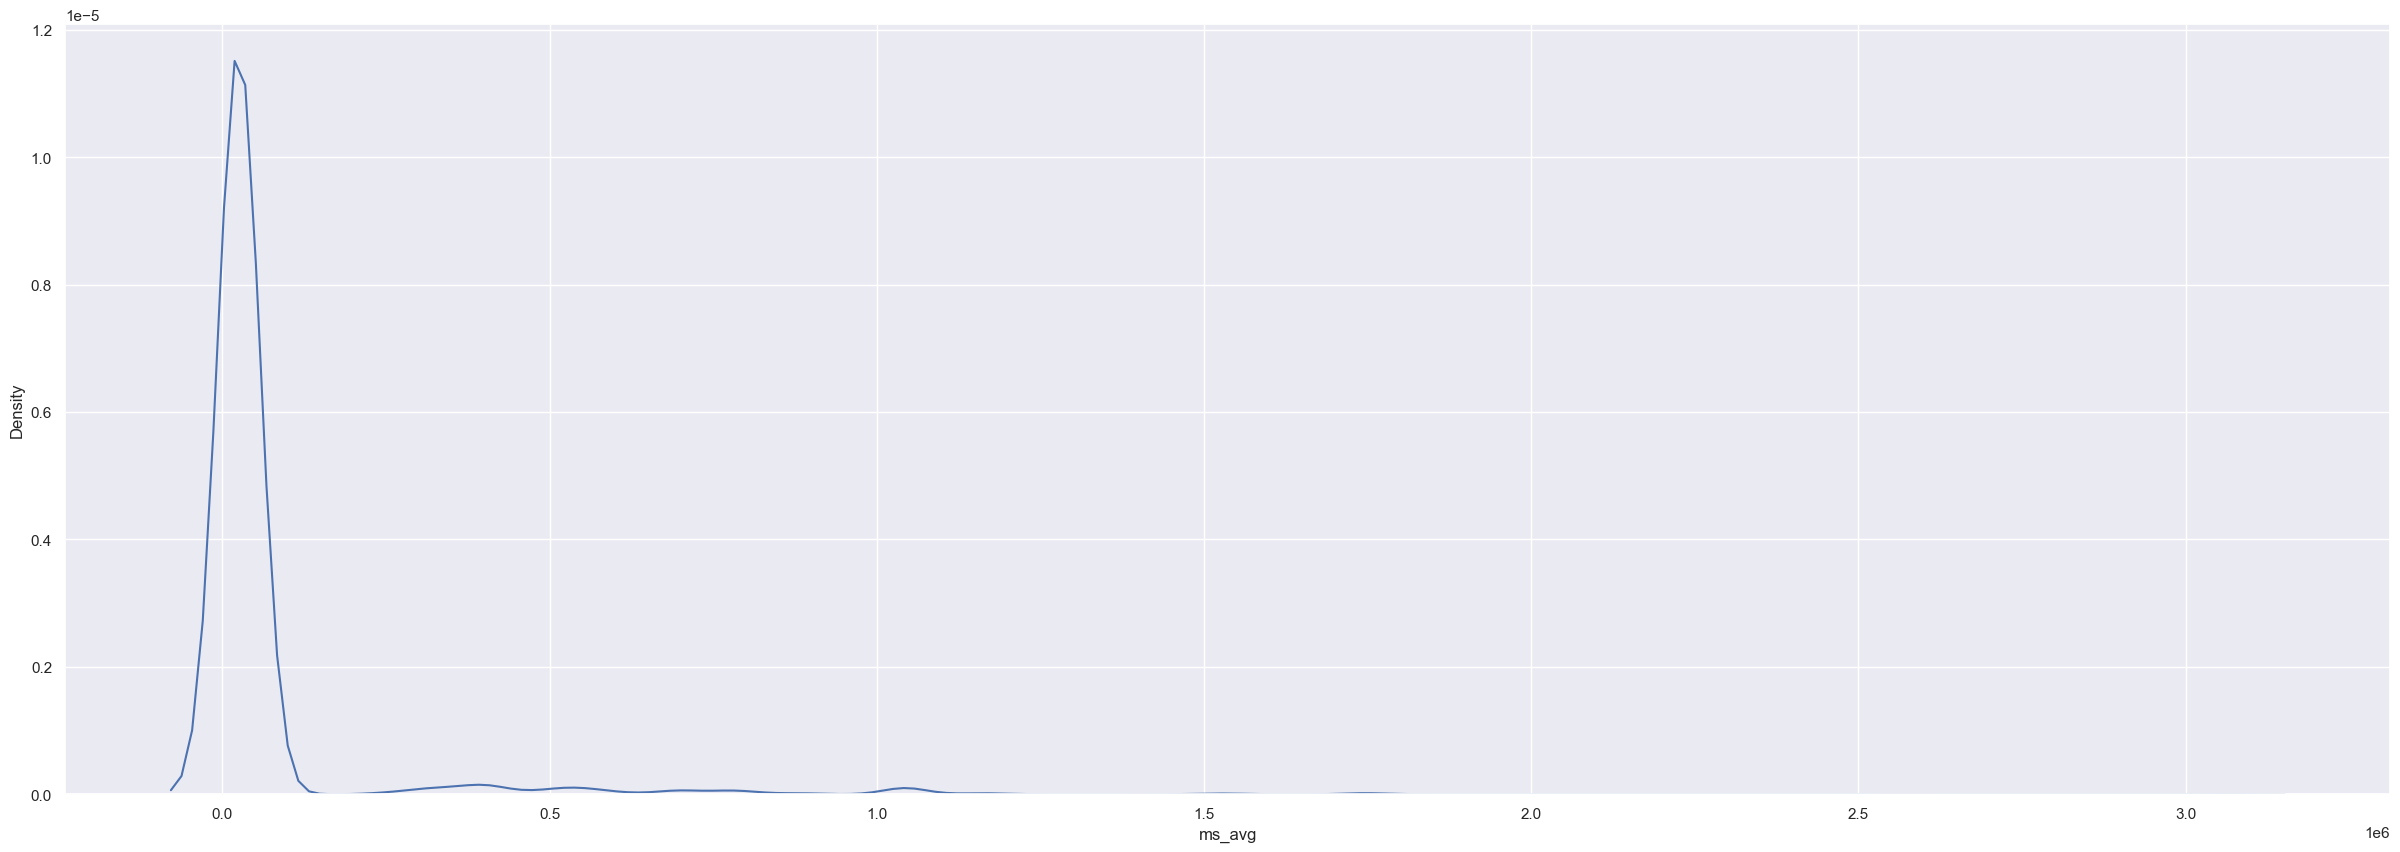

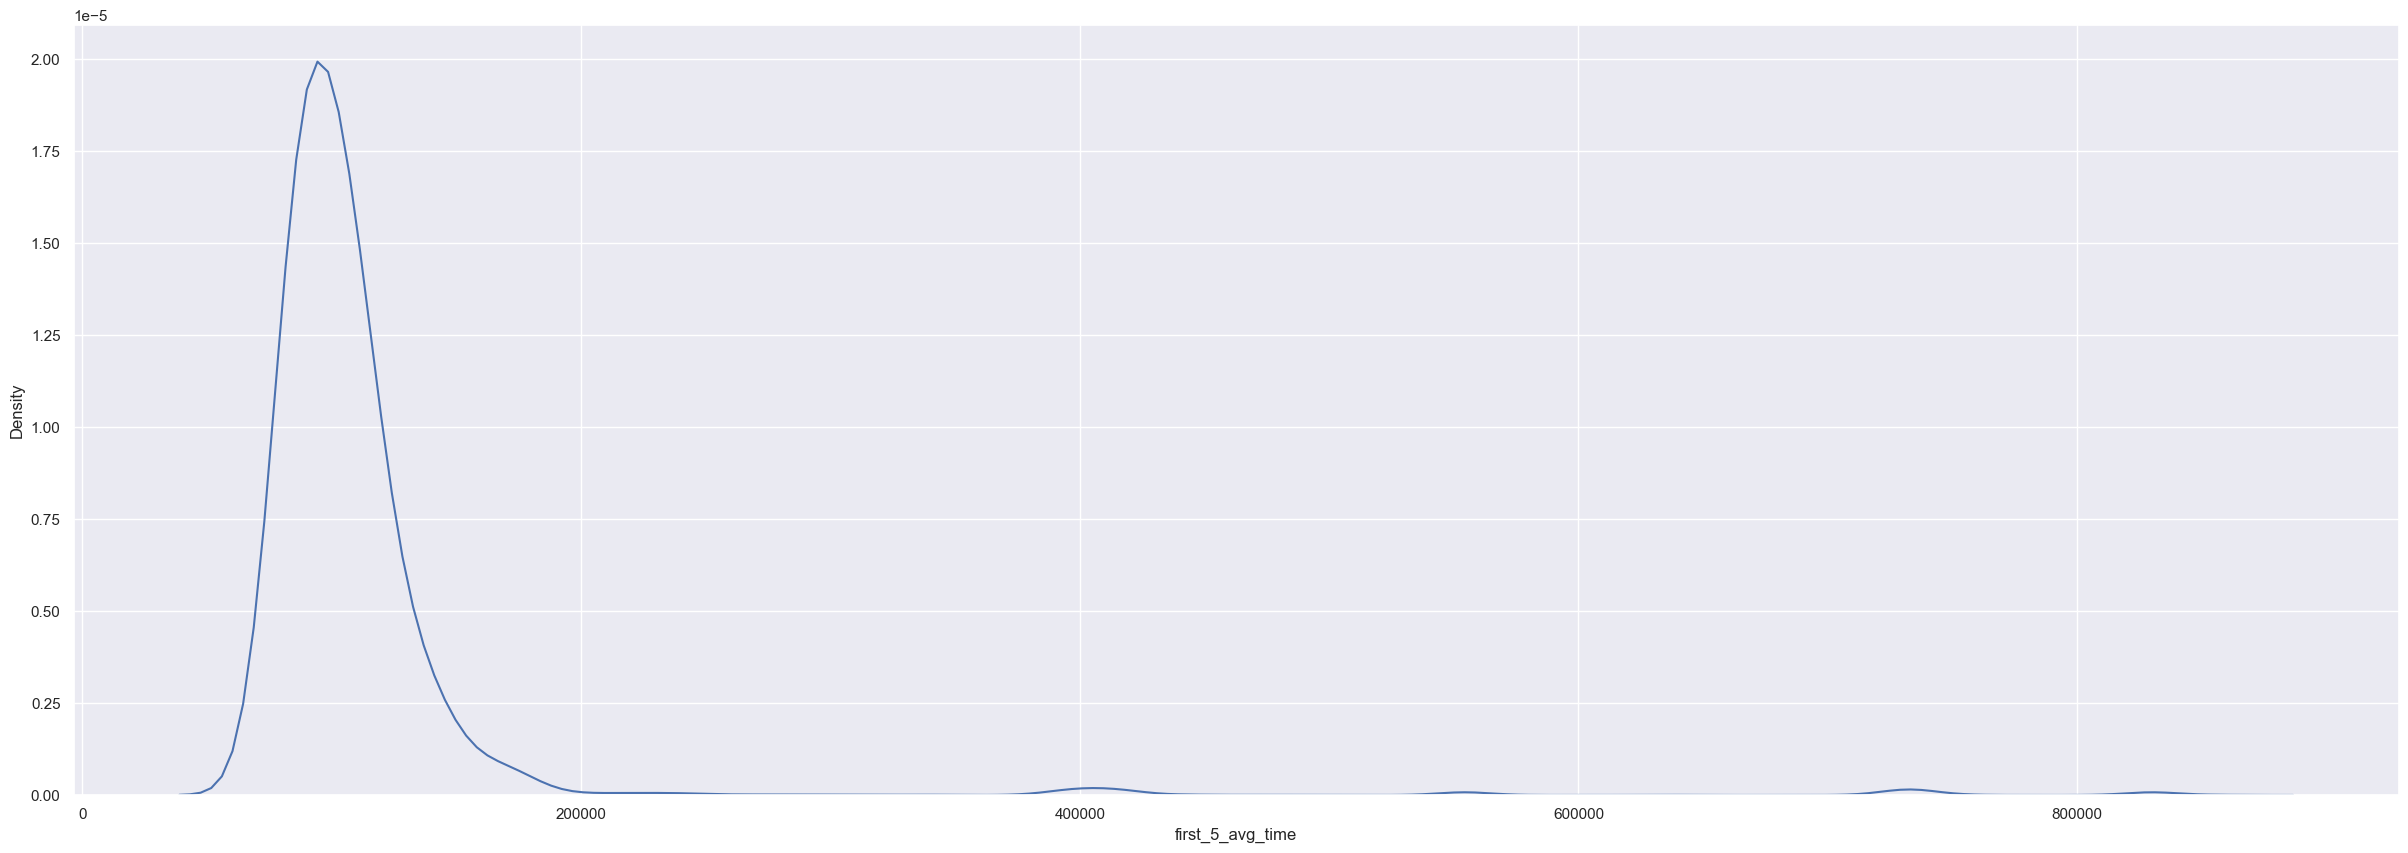

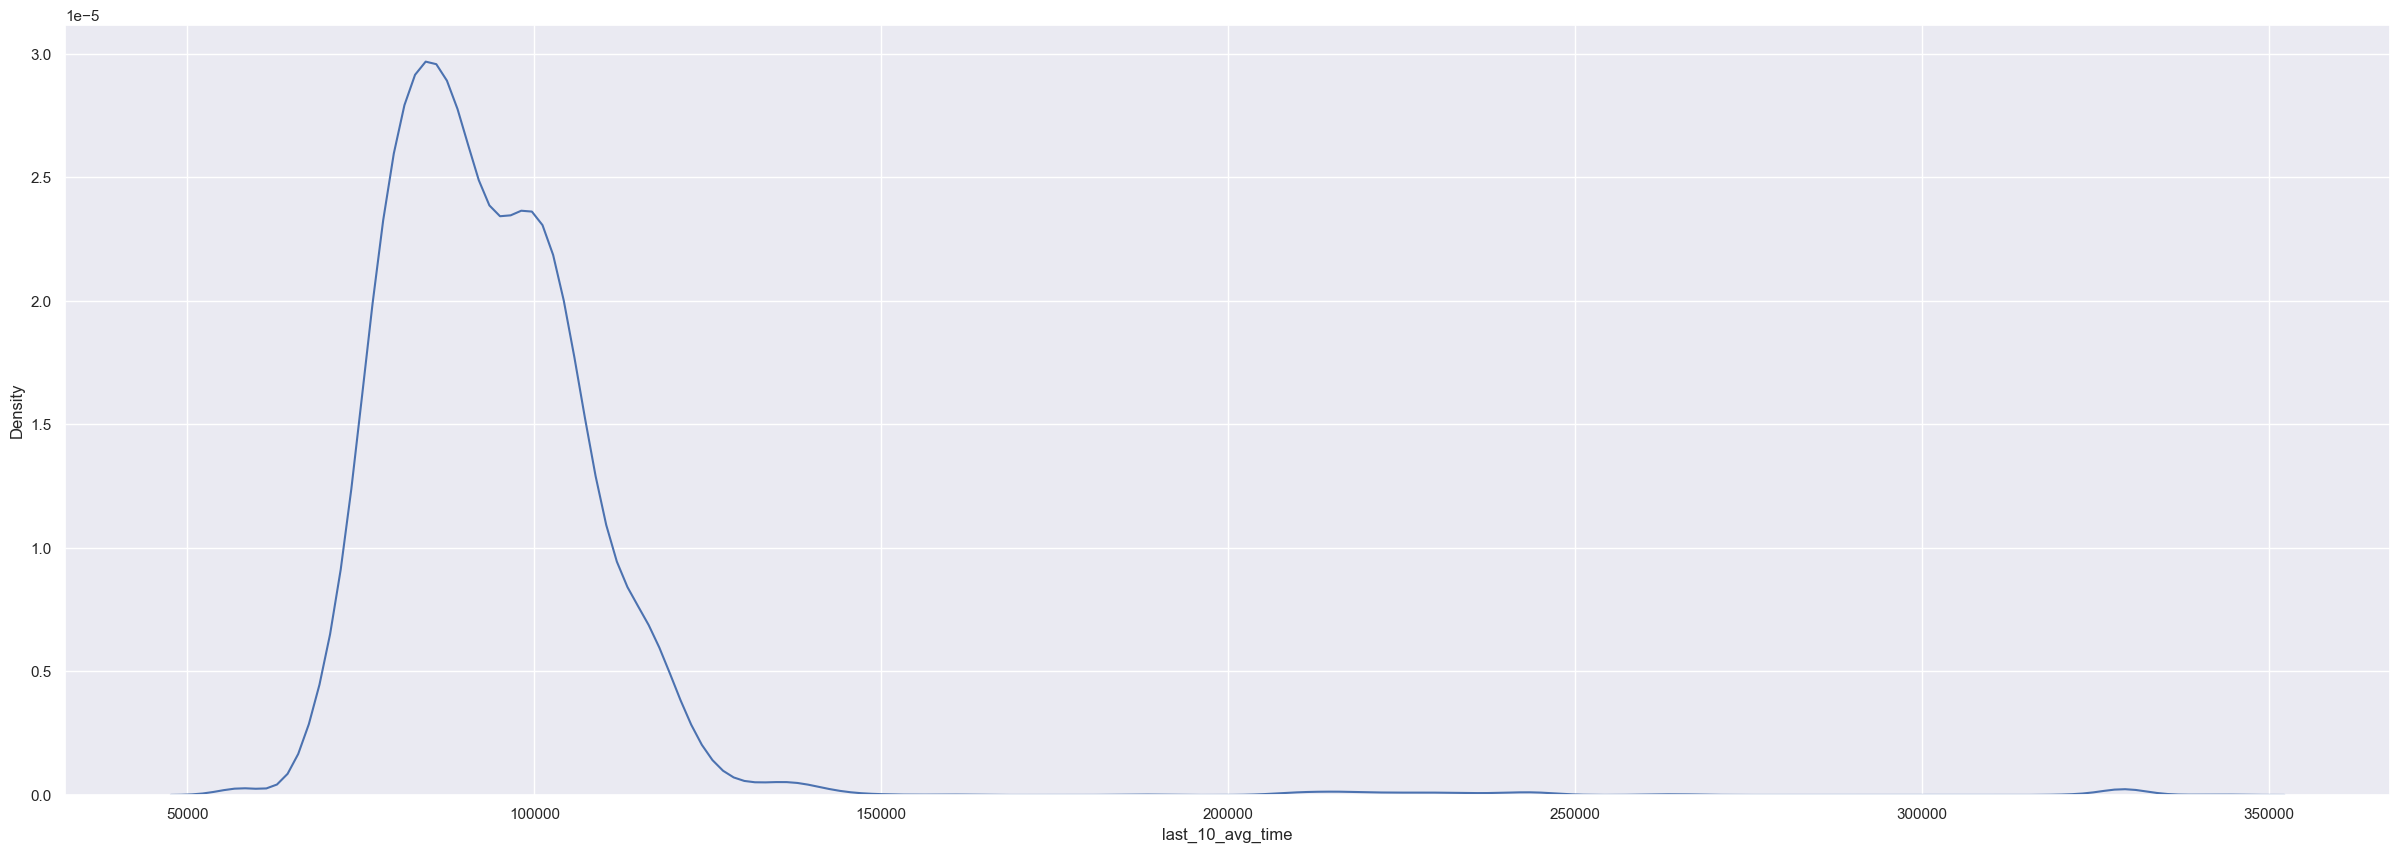

In [81]:
for i in df_num.columns:
    sns.kdeplot(df_11, x = i)
    plt.show()

#### HEATMAP

<AxesSubplot: >

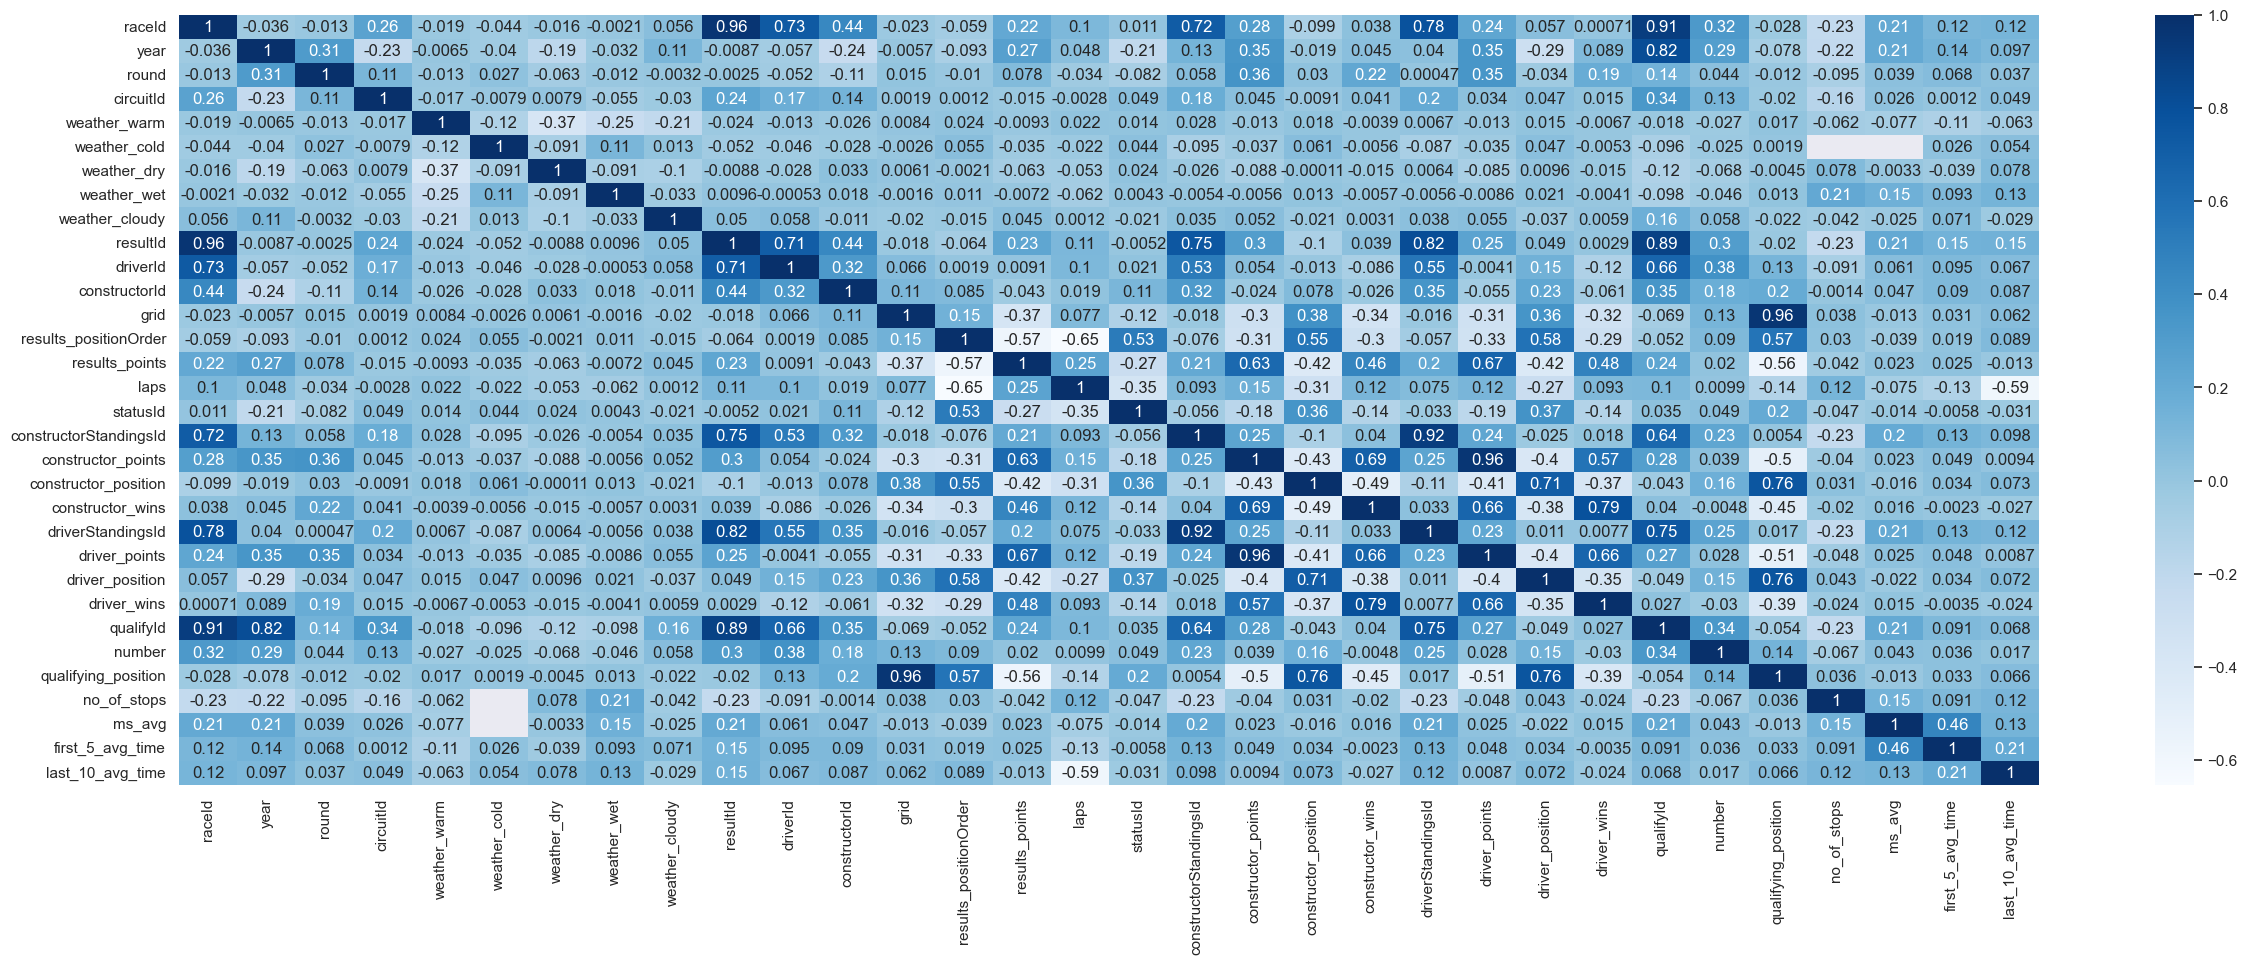

In [79]:
df_num = df_11.select_dtypes(include=[np.number])
sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(df_11.corr(), annot = True, cmap='Blues')

##### GRAPHS

In [ ]:
df_11.head()
df_11.columns

In [ ]:
# Drivers by nationality
nationality_driver = df_11.groupby(['driver_nationality'])['driver_nationality'].count().sort_values(ascending = False).reset_index(name = 'number_of_drivers')
nationality_driver.plot(x = 'driver_nationality', y = 'number_of_drivers', kind = 'bar')    
nationality_driver.set_index('driver_nationality').plot(x = 'driver_nationality', y = 'number_of_drivers', kind = 'pie', autopct='%1.0f%%')    
plt.title('Drivers by nationality')


In [ ]:
# Champions by nationality
from matplotlib.pyplot import title


champions = df_11.groupby(['driver_nationality','year','driverRef'])[['results_points', 'driver_wins']].max().sort_values('results_points', ascending=False).reset_index()
champions.drop_duplicates(subset=['year'], inplace=True)
champion_nations = champions.driver_nationality.value_counts().to_frame()
# champion_nations.plot(kind = 'pie', y = 'driver_nationality', autopct='%1.1f%%')
fig = go.Figure(data = go.Pie(labels=champion_nations.index, values=champion_nations['driver_nationality']))
fig.update_layout(title = 'Champions by Nationality')
fig.show()


In [ ]:
# Most wins in a single season
positions = df_11[df_11['driver_position'] == 1].groupby(['year', 'driverRef'])['driver_wins'].max().sort_values(ascending=False).reset_index(name = 'Wins')
positions = positions[positions['Wins'] >= positions['Wins'].mean()]
positions.rename(columns={'driverRef':'Name'},inplace=True)

fig = px.scatter(positions, x="year", y="Wins", color="Name",
                 title="Most wins in a single season",size = 'Wins')
fig.show()

In [ ]:
df_11.columns